In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

## [CM1] Loading Covid Dataset and Data Cleaning / Preprocessing

In [2]:
df = pd.read_csv('dkmacovid_train.csv')

df.sample(10)

Day  State ID                 State      Lat     Long_   Active  \
344     9        25           Mississippi  32.7416  -89.6787    49619   
1190   27        45                  Utah  40.1500 -111.8624    46034   
1124   26        23              Michigan  43.3266  -84.5361   123757   
438    11        27               Montana  46.9219 -110.4544     4922   
932    22        13                 Idaho  44.2405 -114.4788    82862   
1097   25        42          South Dakota  44.2998  -99.4388     3678   
360     9        41        South Carolina  33.8569  -80.9450   181875   
418    11         5            California  36.1162 -119.6816  2727541   
786    19         5            California  36.1162 -119.6816  3021127   
100     4         9  District of Columbia  38.8974  -77.0268     7980   

      Incident_Rate  Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  \
344     7958.875715             1420446             2.172518   47727.65073   
1190   10626.589620             2557878             0.475514   79785.13755   
1124    6029.604709             9171401             2.541650   91834.70836   
438     8107.670629              845439             1.219808   79103.33109   
932     8885.966655              585359             1.049761   32755.32787   
1097   12115.402660              397521             1.590782   44934.94103   
360     6799.445454             3434733             1.644748   66710.50286   
418     6980.171680            36170528             1.105140   91542.62973   
786     7733.222198            39024543             1.127155   98765.74902   
100     4237.200478              921119             2.665195  130516.51510   

     Resident Population 2020 Census Population Density 2020 Census  \
344                        2,961,279                           63.1   
1190                       3,271,616                           39.7   
1124                      10,077,331                            178   
438                        1,084,225                            7.4   
932                        1,839,106                           22.3   
1097                         886,667                           11.7   
360                        5,118,425                          170.2   
418                       39,538,223                          253.7   
786                       39,538,223                          253.7   
100                          689,545                      11,280.00   

      Density Rank 2020 Census  SexRatio  Confirmed  Deaths  Recovered  
344                         34        94       True    True      False  
1190                        42       101       True    True       True  
1124                        20        97       True    True      False  
438                         50       101       True    True       True  
932                         46       101       True    True       True  
1097                        48       102       True   False       True  
360                         21        94       True    True      False  
418                         13        99       True    True      False  
786                         13        99       True    True      False  
100                          1        96       True    True       True

In [3]:
df.describe()

Day     State ID          Lat        Long_        Active  \
count  1380.000000  1380.000000  1380.000000  1380.000000  1.380000e+03   
mean     16.500000    25.239130    39.470717   -92.879928  2.610390e+05   
std       8.658579    14.513405     6.070494    19.632514  4.914059e+05   
min       2.000000     1.000000    21.094300  -157.498300  9.550000e+02   
25%       9.000000    12.000000    35.630100  -105.311100  2.731600e+04   
50%      16.500000    25.500000    39.583950   -88.259400  1.005915e+05   
75%      24.000000    37.000000    43.326600   -77.209800  2.592418e+05   
max      31.000000    51.000000    61.370700   -69.381900  3.283336e+06   

       Incident_Rate  Total_Test_Results  Case_Fatality_Ratio   Testing_Rate  \
count    1380.000000        1.380000e+03          1380.000000    1380.000000   
mean     7203.192905        5.271097e+06             1.631757   91763.237514   
std      2305.025102        6.991478e+06             0.656702   40858.185997   
min      1232.233261        3.739460e+05             0.439598   30524.071590   
25%      6042.134459        1.310515e+06             1.246993   67457.197525   
50%      7453.675955        2.919566e+06             1.499993   85438.613770   
75%      8621.924085        6.093790e+06             1.817013  104509.453475   
max     12811.162350        4.227902e+07             3.928767  235733.711200   

       Density Rank 2020 Census     SexRatio  
count               1380.000000  1380.000000  
mean                  27.173913    97.760870  
std                   15.378197     3.219219  
min                    1.000000    94.000000  
25%                   13.000000    95.000000  
50%                   28.500000    97.000000  
75%                   41.000000    99.000000  
max                   52.000000   109.000000

In [4]:
df.shape

(1380, 17)

In [5]:
df.columns

Index(['Day', 'State ID', 'State', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [6]:
#display basic information about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day                              1380 non-null   int64  
 1   State ID                         1380 non-null   int64  
 2   State                            1380 non-null   object 
 3   Lat                              1380 non-null   float64
 4   Long_                            1380 non-null   float64
 5   Active                           1380 non-null   int64  
 6   Incident_Rate                    1380 non-null   float64
 7   Total_Test_Results               1380 non-null   int64  
 8   Case_Fatality_Ratio              1380 non-null   float64
 9   Testing_Rate                     1380 non-null   float64
 10  Resident Population 2020 Census  1380 non-null   object 
 11  Population Density 2020 Census   1380 non-null   object 
 12  Density Rank 2020 Ce

In [7]:
#display number of samples of each class
df['Confirmed'].value_counts()

True     1329
False      51
Name: Confirmed, dtype: int64

In [8]:
df['Deaths'].value_counts()

True     1244
False     136
Name: Deaths, dtype: int64

In [9]:
df['Recovered'].value_counts()

True     864
False    516
Name: Recovered, dtype: int64

## Feature Description

##### • Day: Date in January 2021 ranging from Jan 2 to Jan 31.
##### • State ID: Arbitrary ID number for each state, based on alphabetical order. Note there are 51 states since the District of Columbia is also included.
##### • State: Name of the US State.
##### • Lat: Latitude for the geographic centre of the state.
##### • Long : Longitude for the geographic centre of the state.
##### • Active: Number of active, tracked COVID-19 cases that day in that state.
##### • Incident Rate: cases per 100,000 persons
##### • Total Test Results: Total number of people who have been tested
##### • Case Fatality Ratio(%):  Number recorded deaths / Number cases.
##### • Testing Rate: Total test results per 100,000 persons
##### • Resident Population 2021 Census: see original data source
##### • Population Density 2021 Census: see original data source
##### • Density Rank 2021 Census: see original data source
##### • SexRatio: see original data source

# Preprocessing / cleaning the Covid Dataset

#### Preprocessing Steps: 
1.	Checking for Missing values in Columns.
2.	Checking for duplicate records and dropping it if any.
3.	Removing features that are highly dependent upon each other. In Covid Dataset we have [State ID], so we do not need [State, Long, Lat] and dropping these features.
4.	Type Casting the [Resident Population 2020 Census] and [Population Density 2020 Census] data into float data type.
5.	One Hot Encoding of [Day] & [State ID] allows the representation of data to be more expressive. It is used to convert categorical data to integer data.
6.	Checking for outliers - Data point that differs significantly from other observations.By plotting Histograms, we look at data distribution for a variable and find values that fall outside the distribution.
7.	Performing Z Score Regularization - score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. If the Z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
#### Outliers Removal: -
Removing those rows that have [Incident_Rate] greater than 2.5 Z-Score value or lesser than -2.5 Z-Score value
Removing those rows that have [Case_Fatality_Ratio] greater than 3 Z-Score value or lesser than -3 Z-Score value.

In [10]:
df

Day  State ID          State      Lat     Long_   Active  Incident_Rate  \
0       2         1        Alabama  32.3182  -86.9023   162449    7535.061394   
1       2         2         Alaska  61.3707 -152.4044    40421    6534.252848   
2       2         3        Arizona  33.7298 -111.4312   452222    7407.212013   
3       2         4       Arkansas  34.9697  -92.3731    24012    7669.219075   
4       2         5     California  36.1162 -119.6816  2362015    6045.109130   
...   ...       ...            ...      ...       ...      ...            ...   
1375   31        46        Vermont  44.0459  -72.7107     3537    1917.501751   
1376   31        47       Virginia  37.7693  -78.1700   457993    5913.864172   
1377   31        49  West Virginia  38.4912  -80.9545    21195    6751.734093   
1378   31        50      Wisconsin  44.2685  -89.6165    68537   10169.973590   
1379   31        51        Wyoming  42.7560 -107.3025     1313    8969.536543   

      Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  \
0                1891468             1.318688   38576.31315   
1                1290349             0.449781  176386.82510   
2                5218721             1.680608   39916.14181   
3                2079788             1.611203   68917.26567   
4               33391442             1.111215   84509.14544   
...                  ...                  ...           ...   
1375              897351             1.454242  143808.78510   
1376             5234155             1.280560   61322.04732   
1377             1945579             1.672713  108561.35130   
1378             6177575             1.086567  106099.52810   
1379              634985             1.148097  109714.92450   

     Resident Population 2020 Census Population Density 2020 Census  \
0                          5,024,279                           99.2   
1                            733,391                            1.3   
2                          7,151,502                           62.9   
3                          3,011,524                           57.9   
4                         39,538,223                          253.7   
...                              ...                            ...   
1375                         643,077                           69.8   
1376                       8,631,393                          218.6   
1377                       1,793,716                           74.6   
1378                       5,893,718                          108.8   
1379                         576,851                            5.9   

      Density Rank 2020 Census  SexRatio  Confirmed  Deaths  Recovered  
0                           29        94       True   False      False  
1                           52       109       True    True      False  
2                           35        99       True    True       True  
3                           36        96       True    True       True  
4                           13        99       True    True      False  
...                        ...       ...        ...     ...        ...  
1375                        33        97       True    True       True  
1376                        16        97       True    True       True  
1377                        31        98       True    True       True  
1378                        27        99       True    True       True  
1379                        51       104       True   False       True  

[1380 rows x 17 columns]

In [11]:
#checking for null values
df.isnull().sum()

Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64

In [12]:
#Checking for duplicate rows
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicates in the Covid dataset are: {}'.format(duplicated))
else:
    print('Dataset does not contain any duplicate values.')

Dataset does not contain any duplicate values.


In [13]:
#Removing features that are highly dependant upon each other. For example, we have state ID,
#thus we do not need state names, latitutde and longitude measures.

covid = df.copy(deep=True)
covid = covid.drop('Lat', axis=1)
covid = covid.drop('Long_', axis=1)
covid = covid.drop('State', axis=1)

In [14]:
covid

Day  State ID   Active  Incident_Rate  Total_Test_Results  \
0       2         1   162449    7535.061394             1891468   
1       2         2    40421    6534.252848             1290349   
2       2         3   452222    7407.212013             5218721   
3       2         4    24012    7669.219075             2079788   
4       2         5  2362015    6045.109130            33391442   
...   ...       ...      ...            ...                 ...   
1375   31        46     3537    1917.501751              897351   
1376   31        47   457993    5913.864172             5234155   
1377   31        49    21195    6751.734093             1945579   
1378   31        50    68537   10169.973590             6177575   
1379   31        51     1313    8969.536543              634985   

      Case_Fatality_Ratio  Testing_Rate Resident Population 2020 Census  \
0                1.318688   38576.31315                       5,024,279   
1                0.449781  176386.82510                         733,391   
2                1.680608   39916.14181                       7,151,502   
3                1.611203   68917.26567                       3,011,524   
4                1.111215   84509.14544                      39,538,223   
...                   ...           ...                             ...   
1375             1.454242  143808.78510                         643,077   
1376             1.280560   61322.04732                       8,631,393   
1377             1.672713  108561.35130                       1,793,716   
1378             1.086567  106099.52810                       5,893,718   
1379             1.148097  109714.92450                         576,851   

     Population Density 2020 Census  Density Rank 2020 Census  SexRatio  \
0                              99.2                        29        94   
1                               1.3                        52       109   
2                              62.9                        35        99   
3                              57.9                        36        96   
4                             253.7                        13        99   
...                             ...                       ...       ...   
1375                           69.8                        33        97   
1376                          218.6                        16        97   
1377                           74.6                        31        98   
1378                          108.8                        27        99   
1379                            5.9                        51       104   

      Confirmed  Deaths  Recovered  
0          True   False      False  
1          True    True      False  
2          True    True       True  
3          True    True       True  
4          True    True      False  
...         ...     ...        ...  
1375       True    True       True  
1376       True    True       True  
1377       True    True       True  
1378       True    True       True  
1379       True   False       True  

[1380 rows x 14 columns]

In [15]:
#Type-casting the population and population density data into float data type
covid[['Resident Population 2020 Census', 'Population Density 2020 Census']] = covid[['Resident Population 2020 Census', 
                                                                                      'Population Density 2020 Census']].replace({",":""},
                                                                                                                                regex=True).apply(pd.to_numeric,1)
covid.describe()

Day     State ID        Active  Incident_Rate  \
count  1380.000000  1380.000000  1.380000e+03    1380.000000   
mean     16.500000    25.239130  2.610390e+05    7203.192905   
std       8.658579    14.513405  4.914059e+05    2305.025102   
min       2.000000     1.000000  9.550000e+02    1232.233261   
25%       9.000000    12.000000  2.731600e+04    6042.134459   
50%      16.500000    25.500000  1.005915e+05    7453.675955   
75%      24.000000    37.000000  2.592418e+05    8621.924085   
max      31.000000    51.000000  3.283336e+06   12811.162350   

       Total_Test_Results  Case_Fatality_Ratio   Testing_Rate  \
count        1.380000e+03          1380.000000    1380.000000   
mean         5.271097e+06             1.631757   91763.237514   
std          6.991478e+06             0.656702   40858.185997   
min          3.739460e+05             0.439598   30524.071590   
25%          1.310515e+06             1.246993   67457.197525   
50%          2.919566e+06             1.499993   85438.613770   
75%          6.093790e+06             1.817013  104509.453475   
max          4.227902e+07             3.928767  235733.711200   

       Resident Population 2020 Census  Population Density 2020 Census  \
count                     1.380000e+03                     1380.000000   
mean                      5.906191e+06                      454.834783   
std                       6.858898e+06                     1638.774933   
min                       5.768510e+05                        1.300000   
25%                       1.455271e+06                       44.100000   
50%                       4.098304e+06                      103.500000   
75%                       7.029917e+06                      253.700000   
max                       3.953822e+07                    11280.000000   

       Density Rank 2020 Census     SexRatio  
count               1380.000000  1380.000000  
mean                  27.173913    97.760870  
std                   15.378197     3.219219  
min                    1.000000    94.000000  
25%                   13.000000    95.000000  
50%                   28.500000    97.000000  
75%                   41.000000    99.000000  
max                   52.000000   109.000000

In [16]:
#Extracting covid features and separating labels
covid_features = covid[covid.columns.difference(['Confirmed', 'Deaths', 'Recovered'])]
covid_features.head()

Active  Case_Fatality_Ratio  Day  Density Rank 2020 Census  Incident_Rate  \
0   162449             1.318688    2                        29    7535.061394   
1    40421             0.449781    2                        52    6534.252848   
2   452222             1.680608    2                        35    7407.212013   
3    24012             1.611203    2                        36    7669.219075   
4  2362015             1.111215    2                        13    6045.109130   

   Population Density 2020 Census  Resident Population 2020 Census  SexRatio  \
0                            99.2                        5024279.0        94   
1                             1.3                         733391.0       109   
2                            62.9                        7151502.0        99   
3                            57.9                        3011524.0        96   
4                           253.7                       39538223.0        99   

   State ID  Testing_Rate  Total_Test_Results  
0         1   38576.31315             1891468  
1         2  176386.82510             1290349  
2         3   39916.14181             5218721  
3         4   68917.26567             2079788  
4         5   84509.14544            33391442

In [17]:
#One-hot encoding
def One_hot_encoded(covid, feature):
    encoder = LabelBinarizer()
    encoder.fit(covid[feature])
    transformed_feature = encoder.transform(covid[feature])
    ohe = pd.DataFrame(transformed_feature)
    ohe = ohe.add_prefix(feature + '_')
    return covid_features[covid_features.columns.difference([feature])].join(ohe)

In [18]:
covid_features = One_hot_encoded(covid_features, 'State ID')
covid_features = One_hot_encoded(covid_features, 'Day')
covid_features.describe()

Active  Case_Fatality_Ratio  Density Rank 2020 Census  \
count  1.380000e+03          1380.000000               1380.000000   
mean   2.610390e+05             1.631757                 27.173913   
std    4.914059e+05             0.656702                 15.378197   
min    9.550000e+02             0.439598                  1.000000   
25%    2.731600e+04             1.246993                 13.000000   
50%    1.005915e+05             1.499993                 28.500000   
75%    2.592418e+05             1.817013                 41.000000   
max    3.283336e+06             3.928767                 52.000000   

       Incident_Rate  Population Density 2020 Census  \
count    1380.000000                     1380.000000   
mean     7203.192905                      454.834783   
std      2305.025102                     1638.774933   
min      1232.233261                        1.300000   
25%      6042.134459                       44.100000   
50%      7453.675955                      103.500000   
75%      8621.924085                      253.700000   
max     12811.162350                    11280.000000   

       Resident Population 2020 Census     SexRatio   State ID_0   State ID_1  \
count                     1.380000e+03  1380.000000  1380.000000  1380.000000   
mean                      5.906191e+06    97.760870     0.021739     0.021739   
std                       6.858898e+06     3.219219     0.145883     0.145883   
min                       5.768510e+05    94.000000     0.000000     0.000000   
25%                       1.455271e+06    95.000000     0.000000     0.000000   
50%                       4.098304e+06    97.000000     0.000000     0.000000   
75%                       7.029917e+06    99.000000     0.000000     0.000000   
max                       3.953822e+07   109.000000     1.000000     1.000000   

       State ID_10  ...       Day_20       Day_21       Day_22       Day_23  \
count  1380.000000  ...  1380.000000  1380.000000  1380.000000  1380.000000   
mean      0.021739  ...     0.033333     0.033333     0.033333     0.033333   
std       0.145883  ...     0.179571     0.179571     0.179571     0.179571   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
50%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
75%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
max       1.000000  ...     1.000000     1.000000     1.000000     1.000000   

            Day_24       Day_25       Day_26       Day_27       Day_28  \
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean      0.033333     0.033333     0.033333     0.033333     0.033333   
std       0.179571     0.179571     0.179571     0.179571     0.179571   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Day_29  
count  1380.000000  
mean      0.033333  
std       0.179571  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 85 columns]

# Checking for Outliers

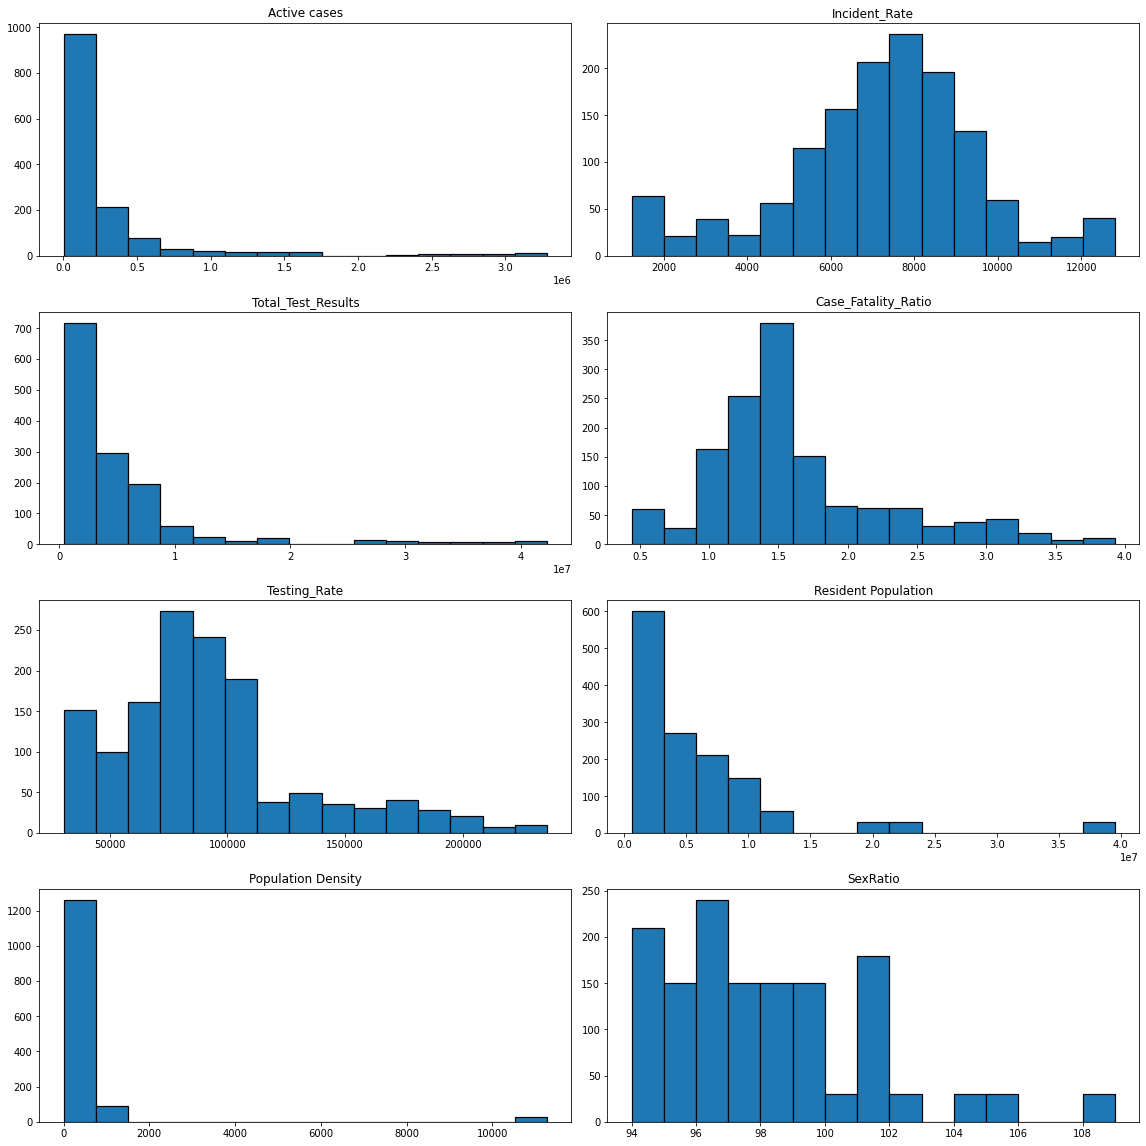

In [19]:
#histograms
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(covid_features['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(covid_features['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(covid_features['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(covid_features['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(covid_features['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(covid_features['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(covid_features['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(covid_features['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')
# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

# Z-score Regularization of the dataset

In [20]:
scaler = preprocessing.StandardScaler()
scaled_covid=covid_features.copy()
scaled_covid=pd.DataFrame(scaler.fit_transform(scaled_covid), columns=scaled_covid.columns)
scaled_covid.head()

Active  Case_Fatality_Ratio  Density Rank 2020 Census  Incident_Rate  \
0 -0.200701            -0.476902                  0.118788       0.144028   
1 -0.449116            -1.800519                  1.614954      -0.290315   
2  0.389194             0.074416                  0.509092       0.088543   
3 -0.482520            -0.031311                  0.574143       0.202252   
4  4.276989            -0.792949                 -0.922023      -0.502599   

   Population Density 2020 Census  Resident Population 2020 Census  SexRatio  \
0                       -0.217091                        -0.128626 -1.168679   
1                       -0.276853                        -0.754447  3.492526   
2                       -0.239250                         0.181627  0.385056   
3                       -0.242302                        -0.422184 -0.547185   
4                       -0.122779                         4.905194  0.385056   

   State ID_0  State ID_1  State ID_10  ...    Day_20    Day_21    Day_22  \
0    6.708204   -0.149071    -0.149071  ... -0.185695 -0.185695 -0.185695   
1   -0.149071    6.708204    -0.149071  ... -0.185695 -0.185695 -0.185695   
2   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695 -0.185695   
3   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695 -0.185695   
4   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695 -0.185695   

     Day_23    Day_24    Day_25    Day_26    Day_27    Day_28    Day_29  
0 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695  
1 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695  
2 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695  
3 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695  
4 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695  

[5 rows x 85 columns]

In [21]:
scaled_covid.dtypes

Active                            float64
Case_Fatality_Ratio               float64
Density Rank 2020 Census          float64
Incident_Rate                     float64
Population Density 2020 Census    float64
                                   ...   
Day_25                            float64
Day_26                            float64
Day_27                            float64
Day_28                            float64
Day_29                            float64
Length: 85, dtype: object

# Dealing with outliers

In [22]:
#Removing those rows that have incident_rate greater than 2.5 Z-Score value or lesser than -2.5 Z-Score value
scaled_covid_clean = scaled_covid[scaled_covid['Incident_Rate'].between (-2.5,2.5)]


In [23]:
#Removing those rows that have Case_Fatality_Ratio greater than 3 Z-Score value or lesser than -3 Z-Score value
scaled_covid_clean = scaled_covid_clean[scaled_covid_clean['Case_Fatality_Ratio'].between (-3,3)]

In [24]:
scaled_covid_clean

Active  Case_Fatality_Ratio  Density Rank 2020 Census  Incident_Rate  \
0    -0.200701            -0.476902                  0.118788       0.144028   
1    -0.449116            -1.800519                  1.614954      -0.290315   
2     0.389194             0.074416                  0.509092       0.088543   
3    -0.482520            -0.031311                  0.574143       0.202252   
4     4.276989            -0.792949                 -0.922023      -0.502599   
...        ...                  ...                       ...            ...   
1375 -0.524201            -0.270412                  0.378991      -2.293948   
1376  0.400942            -0.534982                 -0.726871      -0.559558   
1377 -0.488254             0.062389                  0.248890      -0.195930   
1378 -0.391879            -0.830494                 -0.011313       1.287559   
1379 -0.528728            -0.736766                  1.549904       0.766579   

      Population Density 2020 Census  Resident Population 2020 Census  \
0                          -0.217091                        -0.128626   
1                          -0.276853                        -0.754447   
2                          -0.239250                         0.181627   
3                          -0.242302                        -0.422184   
4                          -0.122779                         4.905194   
...                              ...                              ...   
1375                       -0.235038                        -0.767619   
1376                       -0.144206                         0.397468   
1377                       -0.232108                        -0.599800   
1378                       -0.211231                        -0.001819   
1379                       -0.274045                        -0.777278   

      SexRatio  State ID_0  State ID_1  State ID_10  ...    Day_20    Day_21  \
0    -1.168679    6.708204   -0.149071    -0.149071  ... -0.185695 -0.185695   
1     3.492526   -0.149071    6.708204    -0.149071  ... -0.185695 -0.185695   
2     0.385056   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
3    -0.547185   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
4     0.385056   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
...        ...         ...         ...          ...  ...       ...       ...   
1375 -0.236438   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
1376 -0.236438   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
1377  0.074309   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
1378  0.385056   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   
1379  1.938791   -0.149071   -0.149071    -0.149071  ... -0.185695 -0.185695   

        Day_22    Day_23    Day_24    Day_25    Day_26    Day_27    Day_28  \
0    -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
1    -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
2    -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
3    -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
4    -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
...        ...       ...       ...       ...       ...       ...       ...   
1375 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
1376 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
1377 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
1378 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   
1379 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695 -0.185695   

        Day_29  
0    -0.185695  
1    -0.185695  
2    -0.185695  
3    -0.185695  
4    -0.185695  
...        ...  
1375  5.385165  
1376  5.385165  
1377  5.385165  
1378  5.385165  
1379  5.385165  

[1357 rows x 85 columns]

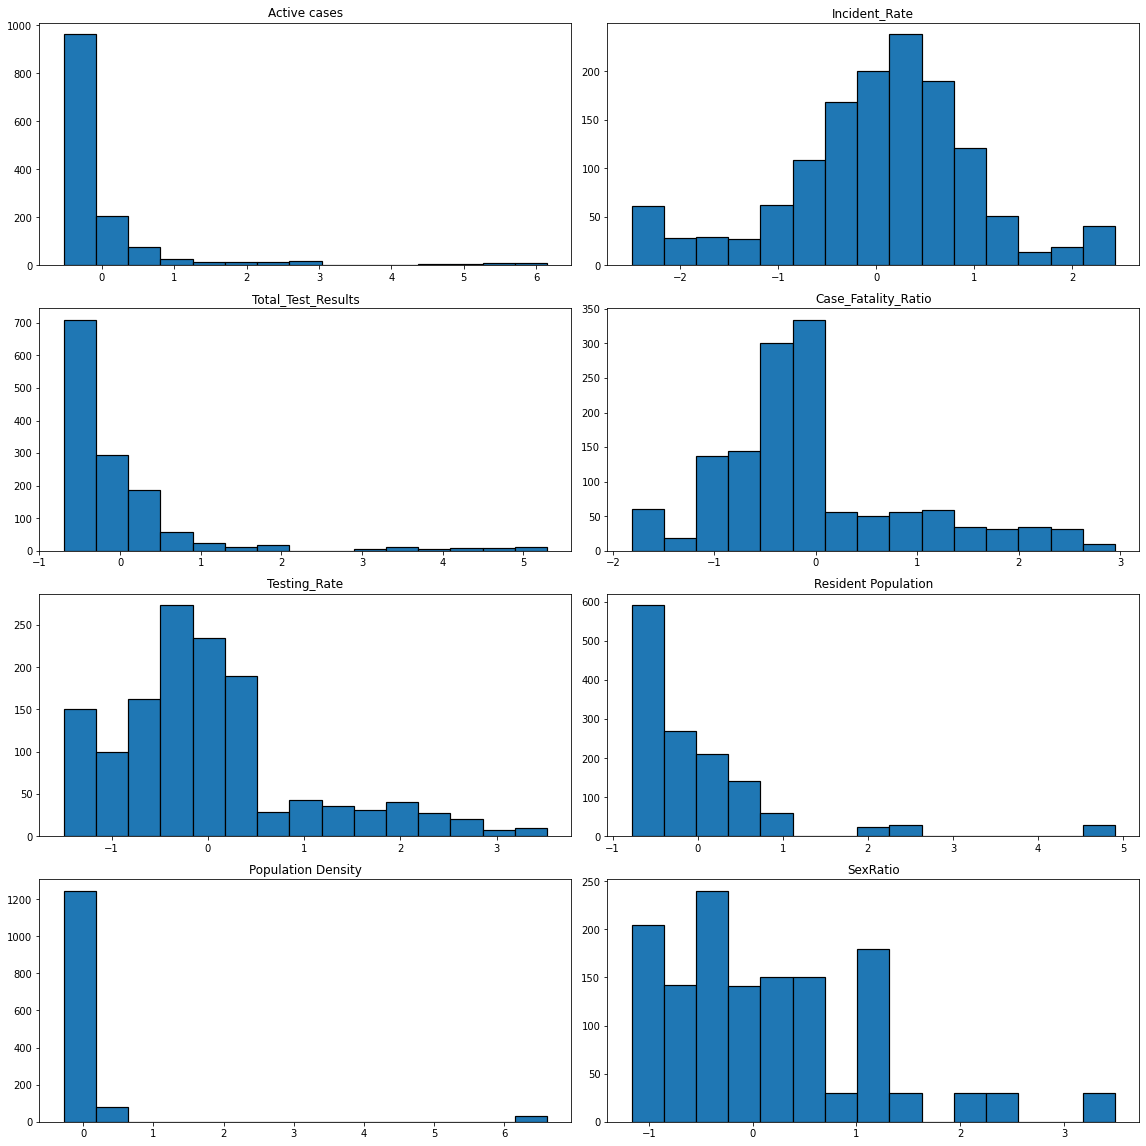

In [25]:
#histograms
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(scaled_covid_clean['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(scaled_covid_clean['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(scaled_covid_clean['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(scaled_covid_clean['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(scaled_covid_clean['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(scaled_covid_clean['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(scaled_covid_clean['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(scaled_covid_clean['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')
# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

### Pairplot of all the attributes against Recovered Label

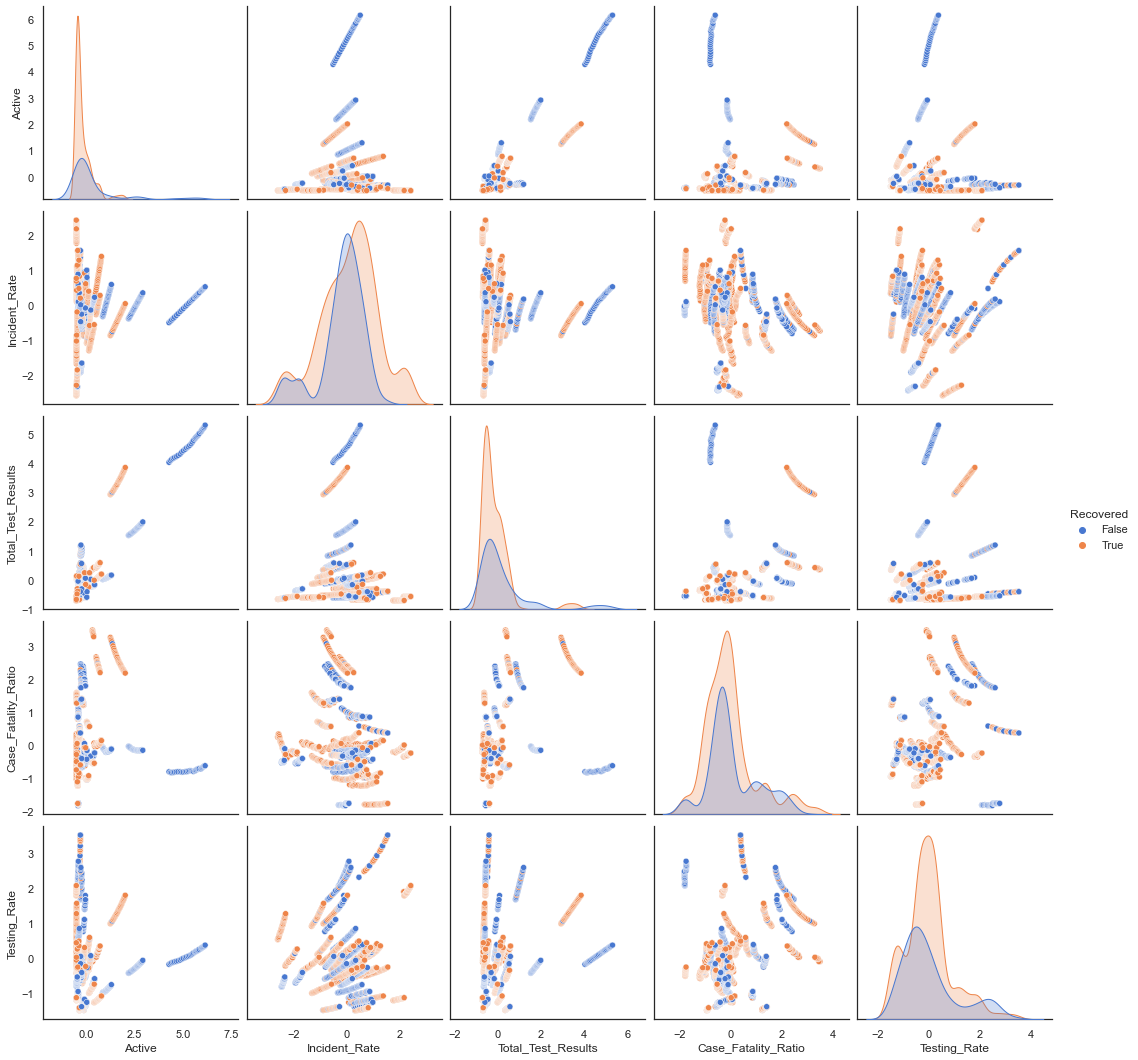

In [26]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Recovered']]),
            hue = 'Recovered', height=3, aspect=1)

### Pairplot of all the attributes against Confirmed Label

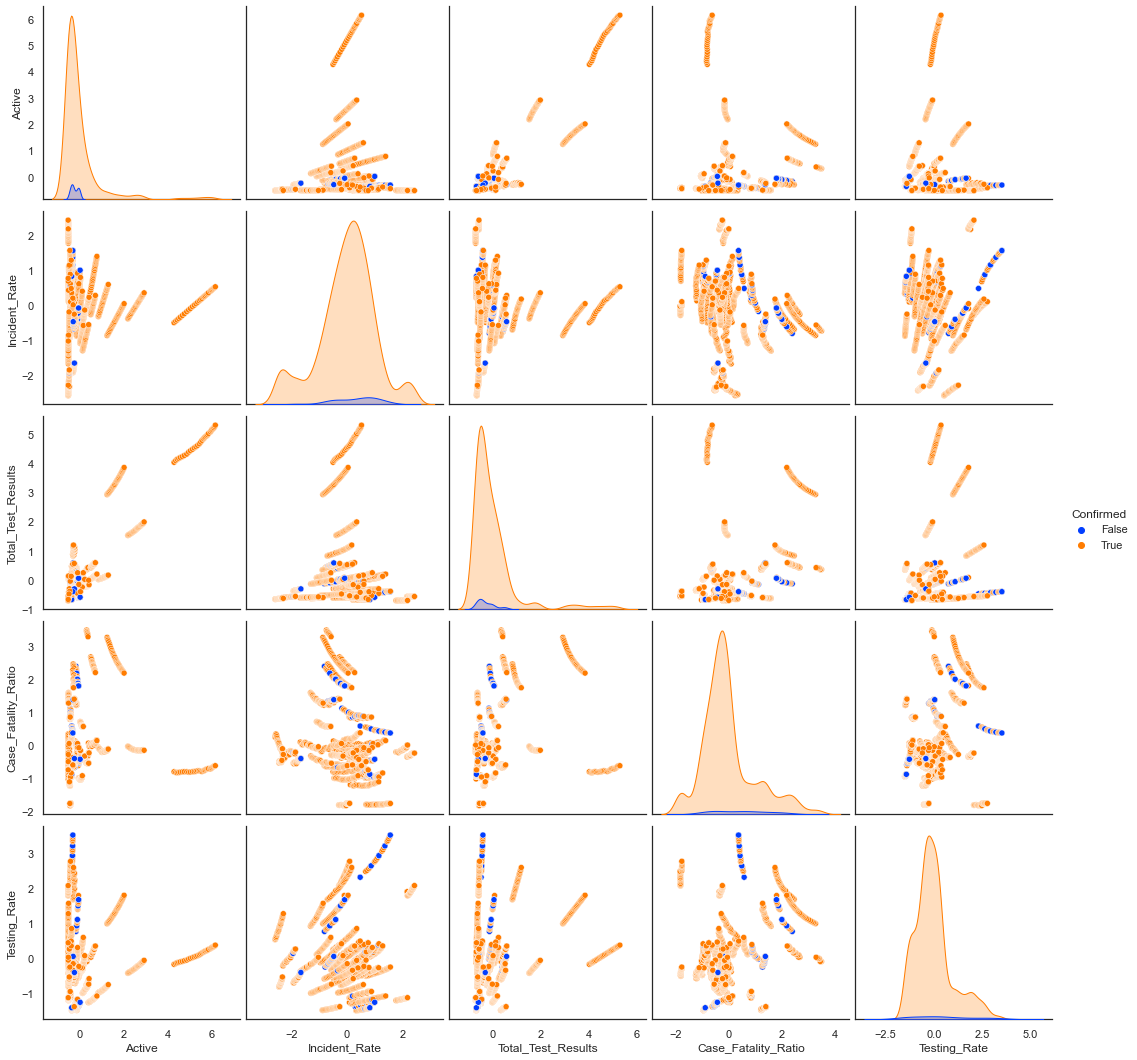

In [27]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="bright", color_codes=True)
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Confirmed']]),
            hue = 'Confirmed', height=3, aspect=1)

### Pairplot of all the attributes against Deaths Label

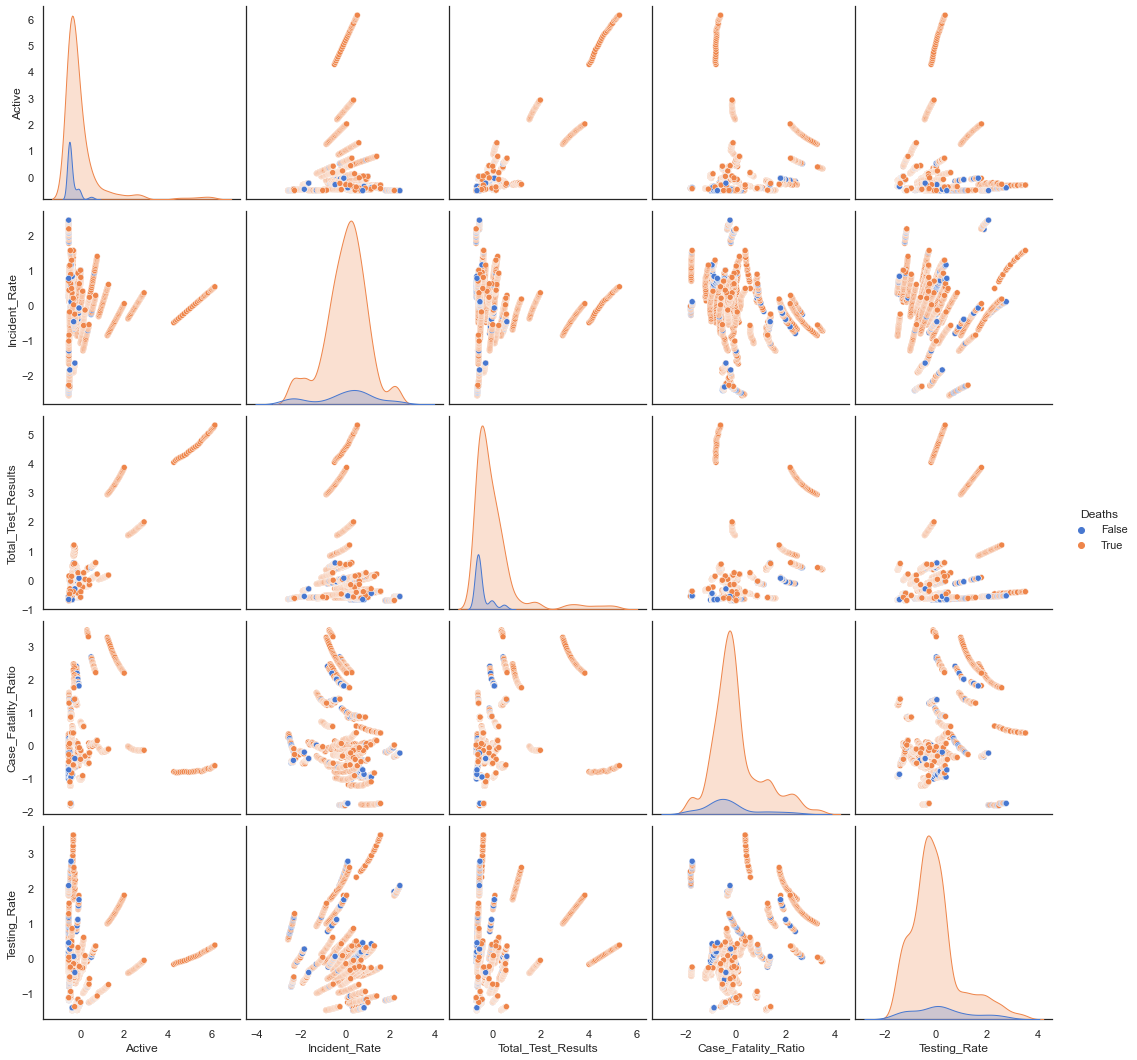

In [28]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Deaths']]),
            hue = 'Deaths', height=3, aspect=1)
plt.show()

## [CM2] PCA and LDA Implementation

### PCA Implementation

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. It helps us to identify patterns in data based on the correlation between features. As a result of transforming the original d-dimensional data onto this new k-dimensional subspace (typically k ≪ d), the first principal component will have the largest possible variance.

In [29]:
from sklearn.decomposition import PCA
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def implement_PCA(components, data, svd_solver='auto'):
    pca = PCA(n_components = components, svd_solver=svd_solver)
    Principal_Components = pca.fit_transform(data)
    df_pca = pd.DataFrame(data = Principal_Components)
    return(df_pca, pca)

def PCA_ScreePlot(pca):
    pc_value = np.arange(pca.n_components_) + 1
    plt.figure(figsize=(15,8)) 
    plt.plot(pc_value, pca.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.grid()
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of variance explained')
    plt.locator_params(axis="y", nbins=25)
    plt.show()
    

## Applying PCA with n_components = 10

In [30]:
pca_implement = implement_PCA(components = 10, data=scaled_covid)
pca_features_covid = pca_implement[0]
pca_covid_data = pca_implement[1]

## Scree Plot depicting the cumulative variance represented by the eigen vectors

Using Scree Plot which depicts the cumulative variance represented by the eigen vectors. (Plotting n_components vs Variance). The best values of n_components is when slope starts leveling off.

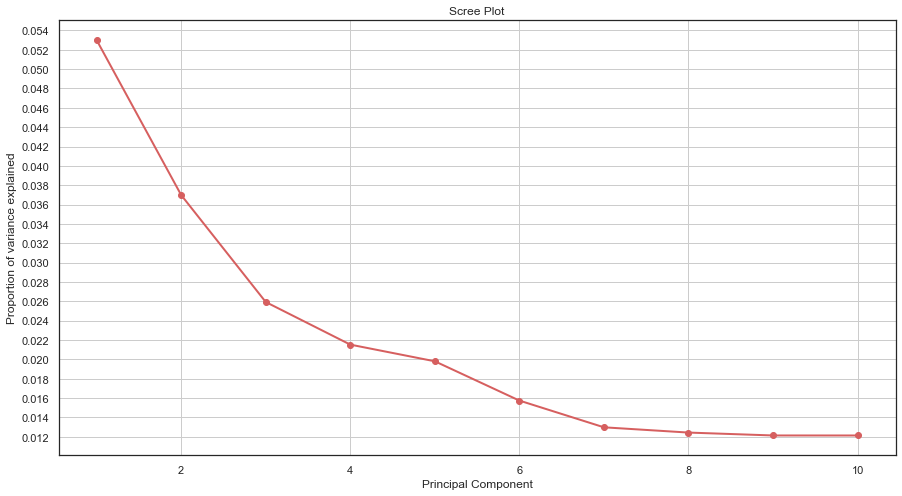

In [31]:
PCA_ScreePlot(pca_covid_data)

### From the above graph, we can note that at the 4th principal component, the cumulative variance is less than 0.022, thus even at the 4th component we do not lose much information and we have retained over 99.97% of the characteristics. So, we can select the first 4 PCA components. If we need to save more information, we can consider more components. 

## Plotting the first 2 PCA components on Day 3 data for all the states

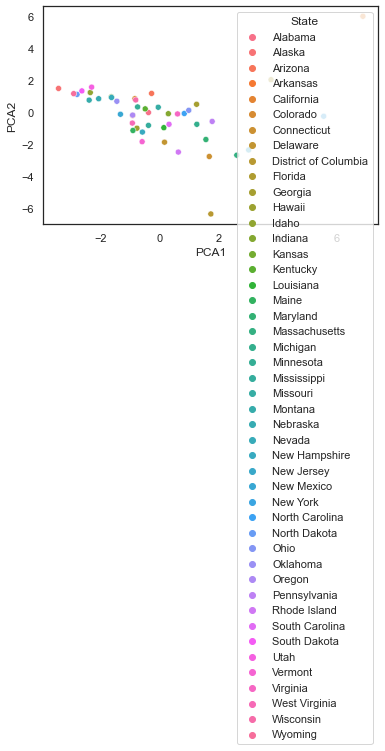

In [32]:
day_3_covid_data_indices = df.index[df['Day'] == 3]
day_3_covid_data = pca_features_covid.iloc[day_3_covid_data_indices, 0:2]
state_names = df.iloc[day_3_covid_data_indices, 2]
day_3_covid_data = day_3_covid_data.join(state_names)
day_3_covid_data.columns = ['PCA1', 'PCA2', 'State']
p = sns.scatterplot(x='PCA1', y='PCA2', hue='State', data=day_3_covid_data)


## LDA Implementation

#### Linear Discriminant Analysis (LDA) is a dimensionality reduction technique which is commonly used for the supervised classification problems. It reduces the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible. It is used to project the features in higher dimension space into a lower dimension space.

In [33]:
def train_LDA(traindata, trainlabels, components=1):
    lda = LinearDiscriminantAnalysis(n_components = components)
    lda_function = lda.fit(traindata, trainlabels)
    return lda_function

### Applying LDA 

#### Splitting the train and test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled_covid, covid[['Recovered', 'Deaths', 'Confirmed']],
                                                   test_size=0.05, random_state=98)

### Implementing LDA on Recovered class

In [35]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Recovered'])
print("............Performance Report of LDA for Recovered Class.......\n")
print(classification_report(y_test['Recovered'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Recovered'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Recovered Class.......

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        24
        True       0.98      0.98      0.98        45

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

AUC Score: 0.9681

[[-6.87663512e+00  1.32005133e+00  1.06214689e+00  4.39047764e+00
   5.75077829e-01 -1.38535985e+00  3.06576956e-01 -1.28810321e+00
  -2.39610549e+00 -7.17592165e-01 -1.49730462e-01  1.06203005e+00
   6.48686772e-01 -4.91359684e-01  1.71272964e+00 -2.29807719e+00
   2.50599768e+00  1.50565435e+00 -3.32508744e+00  1.33756308e+00
  -1.93736190e+00  4.26094594e-01 -1.80089760e+00 -1.28530102e+00
   8.62294192e-01  6.39495309e-03 -2.05732999e+00  2.17148061e+00
   9.78678760e-01  8.12538637e-01  2.37958745e-01 -9.10979648e-01
  -1.60857826e+00 -8.60955088e-01  1.05058831e+00  8.5556885

In [36]:
lda.explained_variance_ratio_

array([1.])

### Implementing LDA on Confirmed class

In [37]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Confirmed'])
print("............Performance Report of LDA for Confirmed Class.......\n")
print(classification_report(y_test['Confirmed'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Confirmed'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Confirmed Class.......

              precision    recall  f1-score   support

       False       0.25      0.33      0.29         3
        True       0.97      0.95      0.96        66

    accuracy                           0.93        69
   macro avg       0.61      0.64      0.62        69
weighted avg       0.94      0.93      0.93        69

AUC Score: 0.6439

[[-3.14891995e+00  1.20271888e+00  2.88367235e-01  6.69027596e+00
  -7.77462611e-02  4.79793376e-01 -4.82734724e-01  2.96338502e-01
  -5.92252467e-01  9.71691597e-01  3.20961701e+00  3.94866880e-01
  -5.67749753e-01 -1.18658074e+00  7.48302286e-01 -1.50310467e+00
   2.20984116e+00  6.36992679e-01 -1.81953353e+00  3.45510942e-01
  -5.65741393e-01 -4.17832093e-01 -4.97752853e-02  8.47483658e-01
   8.91579097e-02 -1.22447978e+00  2.25333206e-01  1.70943551e+00
  -2.06474909e-01 -2.07232988e-01 -3.06681142e-01 -1.63335151e+00
   2.94866591e-01 -3.01820629e+00  3.18764815e-01 -6.5264384

### Implementing LDA on Deaths class

In [38]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Deaths'])
print("............Performance Report of LDA for Recovered Class.......\n")
print(classification_report(y_test['Deaths'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Deaths'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Recovered Class.......

              precision    recall  f1-score   support

       False       0.33      0.11      0.17         9
        True       0.88      0.97      0.92        60

    accuracy                           0.86        69
   macro avg       0.61      0.54      0.54        69
weighted avg       0.81      0.86      0.82        69

AUC Score: 0.5389

[[-1.60554047e+00  1.55999606e+00  2.17089425e-01  1.76695016e+00
   7.61140067e-02 -6.56292709e-01 -3.86849623e-01  6.24082803e-02
  -1.51406917e-01  4.38453880e-01  2.51854439e-01  1.16475018e-02
   1.97108562e-03 -2.56860405e-01  5.76917573e-01 -6.53212456e-01
   8.83239079e-01  2.43311161e-01 -6.89229401e-01 -9.87239663e-02
  -5.33887221e-01  1.31471537e-01 -1.39113342e-01  4.29727775e-01
   2.21939507e-01 -2.12442081e-01  3.73124135e-01  5.25496365e-01
  -7.25244642e-01  1.91751073e-01  7.97224487e-02 -1.45275075e+00
   1.28731168e-01 -5.57786550e-01  1.51646966e-01  3.3579108

### Observations: 
It is evident that LDA provides better and improved classification for the Recovered class than that of Deaths and Confirmed class. Accuracy of classification for label “Recovered” is 97% when compared to 81% and 94% for label “Deaths” and “Confirmed” respectively.

## [CM3] Decision Tree Classifier

#### Utilities:

In [39]:
def TrainedGridOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print("Optimum value of Max_depth \n", grid.best_params_['max_depth'])
    if 'n_estimators' in grid.best_params_:
        print('Best No. of Trees \n', grid.best_params_['n_estimators'])
    

## Case Study 1: Decision Tree Classifier Using Original Preprocessed Dataset

### Case study 1A: Assuming k= 5 for k-fold cross validation; and taking target label as 'Recovered'

max_depth: 3 	Accuracy: 75.80%
max_depth: 5 	Accuracy: 83.41%
max_depth: 10 	Accuracy: 91.30%
max_depth: None 	Accuracy: 90.94%


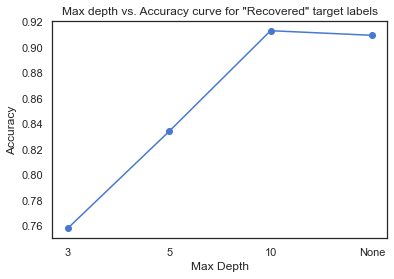

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x1 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y1 = covid['Recovered'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x1, y1, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Recovered" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 91.30% is obtained at max_depth = 10 and None. 

### Analysing the Decision Tree for "Recovered" target labels for Covid Dataset and Max depth = 3

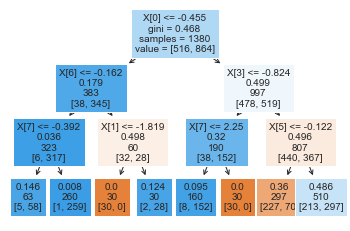

<Figure size 2880x2880 with 0 Axes>

|--- Active <= -0.45
|   |--- Population Density 2020 Census <= -0.16
|   |   |--- SexRatio <= -0.39
|   |   |   |--- class: True
|   |   |--- SexRatio >  -0.39
|   |   |   |--- class: True
|   |--- Population Density 2020 Census >  -0.16
|   |   |--- Incident_Rate <= -1.82
|   |   |   |--- class: False
|   |   |--- Incident_Rate >  -1.82
|   |   |   |--- class: True
|--- Active >  -0.45
|   |--- Case_Fatality_Ratio <= -0.82
|   |   |--- SexRatio <= 2.25
|   |   |   |--- class: True
|   |   |--- SexRatio >  2.25
|   |   |   |--- class: False
|   |--- Case_Fatality_Ratio >  -0.82
|   |   |--- Resident Population 2020 Census <= -0.12
|   |   |   |--- class: False
|   |   |--- Resident Population 2020 Census >  -0.12
|   |   |   |--- class: True



In [41]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec1_tree = dec_tree.fit(x1,y1)
    tree.plot_tree(dec1_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec1_tree, feature_names = covid_col.tolist())
    print(text_representation)

## Observations:

#### 1. From the above figure, we can deduce that the root node splits on the Active case feature. The split was on the rule "Active <= -0.45" and it was further divided on the basis of Population density (Population Density 2020 Census <= -0.16) on left side and Case_Fatality_Ratio (Case_Fatality_Ratio <= -0.82) on the right side. This depicts that there is a direct correlation between the Active cases and Population density as well as between Active cases and Case Fatality Ratio.

#### 2. The left node further divides on the basis of Sex Ratio and Incident Rate post dividing on the basis of Population density. This shows that there is a direct correlation between Population density and Incident Rate, as well as between Population density and sex ratio. 

#### 3. Similar to this, there is a direct correlation observed between Active cases and Case Fatality Ratio. 

### Searching for best paramter for Decision Tree for "Recovered" Label:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x1 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x1, covid['Recovered'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [43]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9086956521739131

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Case Study 1B: Assuming k= 5 for k-fold cross validation; and taking target label as 'Deaths'

max_depth: 3 	Accuracy: 90.65%
max_depth: 5 	Accuracy: 89.78%
max_depth: 10 	Accuracy: 88.55%
max_depth: None 	Accuracy: 87.54%


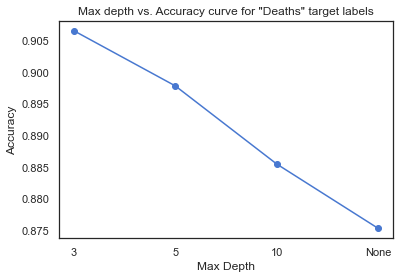

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x2 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y2 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x2, y2, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 90.65% is obtained at max_depth = 3.

### Analysing the Decision Tree for "Deaths" target labels for Covid Dataset and Max depth = 3

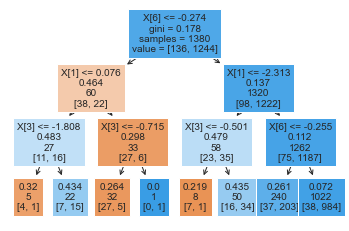

<Figure size 2880x2880 with 0 Axes>

|--- Population Density 2020 Census <= -0.27
|   |--- Incident_Rate <= 0.08
|   |   |--- Case_Fatality_Ratio <= -1.81
|   |   |   |--- class: False
|   |   |--- Case_Fatality_Ratio >  -1.81
|   |   |   |--- class: True
|   |--- Incident_Rate >  0.08
|   |   |--- Case_Fatality_Ratio <= -0.71
|   |   |   |--- class: False
|   |   |--- Case_Fatality_Ratio >  -0.71
|   |   |   |--- class: True
|--- Population Density 2020 Census >  -0.27
|   |--- Incident_Rate <= -2.31
|   |   |--- Case_Fatality_Ratio <= -0.50
|   |   |   |--- class: False
|   |   |--- Case_Fatality_Ratio >  -0.50
|   |   |   |--- class: True
|   |--- Incident_Rate >  -2.31
|   |   |--- Population Density 2020 Census <= -0.25
|   |   |   |--- class: True
|   |   |--- Population Density 2020 Census >  -0.25
|   |   |   |--- class: True



In [45]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec2_tree = dec_tree.fit(x2,y2)
    tree.plot_tree(dec2_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec2_tree, feature_names = covid_col.tolist())
    print(text_representation)

## Observations: 

#### 1. From the above figure, we can deduce that the root node splits on the Population density feature. The left side of the root node further divides on the basis of Incident Rate followed by Case_Fatality_Ratio. This depicts that there is a direct correlation between Population density of a state and Incident Rate.

#### 2. It is also evident that there is a direct correlation between Incident Rate and Case_Fatality_Ratio.

### Searching for best paramter for Decision Tree for "Deaths" Label:

In [46]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x2 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x2, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [47]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.906521739130435

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Case Study 1C: Assuming k= 5 for k-fold cross validation; and taking target label as 'Confirmed'

max_depth: 3 	Accuracy: 96.38%
max_depth: 5 	Accuracy: 95.87%
max_depth: 10 	Accuracy: 94.13%
max_depth: None 	Accuracy: 93.91%


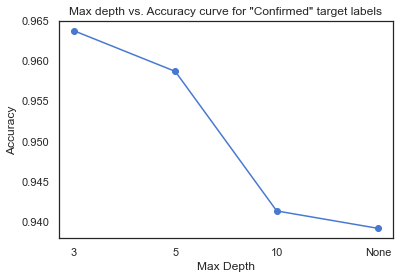

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x3 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y3 = covid['Confirmed'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x3, y3, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Confirmed" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 96.38% is obtained at max_depth = 3.

### Analysing the Decision Tree for all the target label [ 'Confirmed'] for Covid Dataset and Max depth = 3

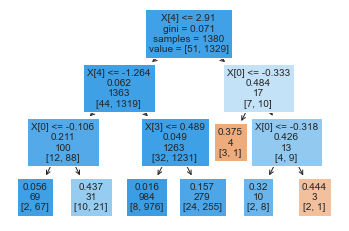

<Figure size 2880x2880 with 0 Axes>

|--- Testing_Rate <= 2.91
|   |--- Testing_Rate <= -1.26
|   |   |--- Active <= -0.11
|   |   |   |--- class: True
|   |   |--- Active >  -0.11
|   |   |   |--- class: True
|   |--- Testing_Rate >  -1.26
|   |   |--- Case_Fatality_Ratio <= 0.49
|   |   |   |--- class: True
|   |   |--- Case_Fatality_Ratio >  0.49
|   |   |   |--- class: True
|--- Testing_Rate >  2.91
|   |--- Active <= -0.33
|   |   |--- class: False
|   |--- Active >  -0.33
|   |   |--- Active <= -0.32
|   |   |   |--- class: True
|   |   |--- Active >  -0.32
|   |   |   |--- class: False



In [49]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec3_tree = dec_tree.fit(x3,y3)
    tree.plot_tree(dec3_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec3_tree, feature_names = covid_col.tolist())
    print(text_representation)

### Observations:
#### 1. From the above figure, we can deduce that the root node splits on the Testing_Rate (Testing_Rate <= 2.91) which gets further divided on the basis of Testing_Rate and Active cases. This shows that there is a correlation between Testing_Rate and Active cases. 

#### 2. It is also observed that there is a correlation between Testing_Rate and Case_Fatality_Ratio.

### Searching for best paramter for Decision Tree for "Confirmed" Label:

In [50]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x3 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x3, covid['Confirmed'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [51]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9630434782608696

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Case Study 1D: Assuming k= 5 for k-fold cross validation; and taking all the three target labels: 'Recovered', 'Confirmed' and 'Deaths' for hybrid dataset

max_depth: 3 	Accuracy: 93.48%
max_depth: 5 	Accuracy: 93.12%
max_depth: 10 	Accuracy: 91.45%
max_depth: None 	Accuracy: 90.94%


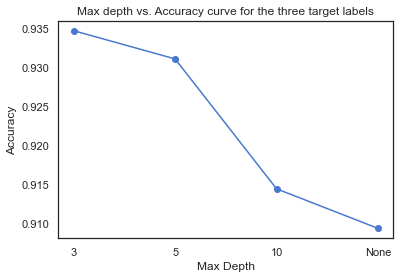

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x4 = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].join(covid[['Recovered', 'Confirmed']])).values
y4 = covid[['Deaths']].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x4, y4, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for the three target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 93.48% is obtained at max_depth = 3.

### Searching for best paramter for Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed']

In [53]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x4 = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].join(covid[['Recovered', 'Confirmed']])).values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x4, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [54]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9369565217391305

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Analysing the Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Covid Dataset and Max depth = 3

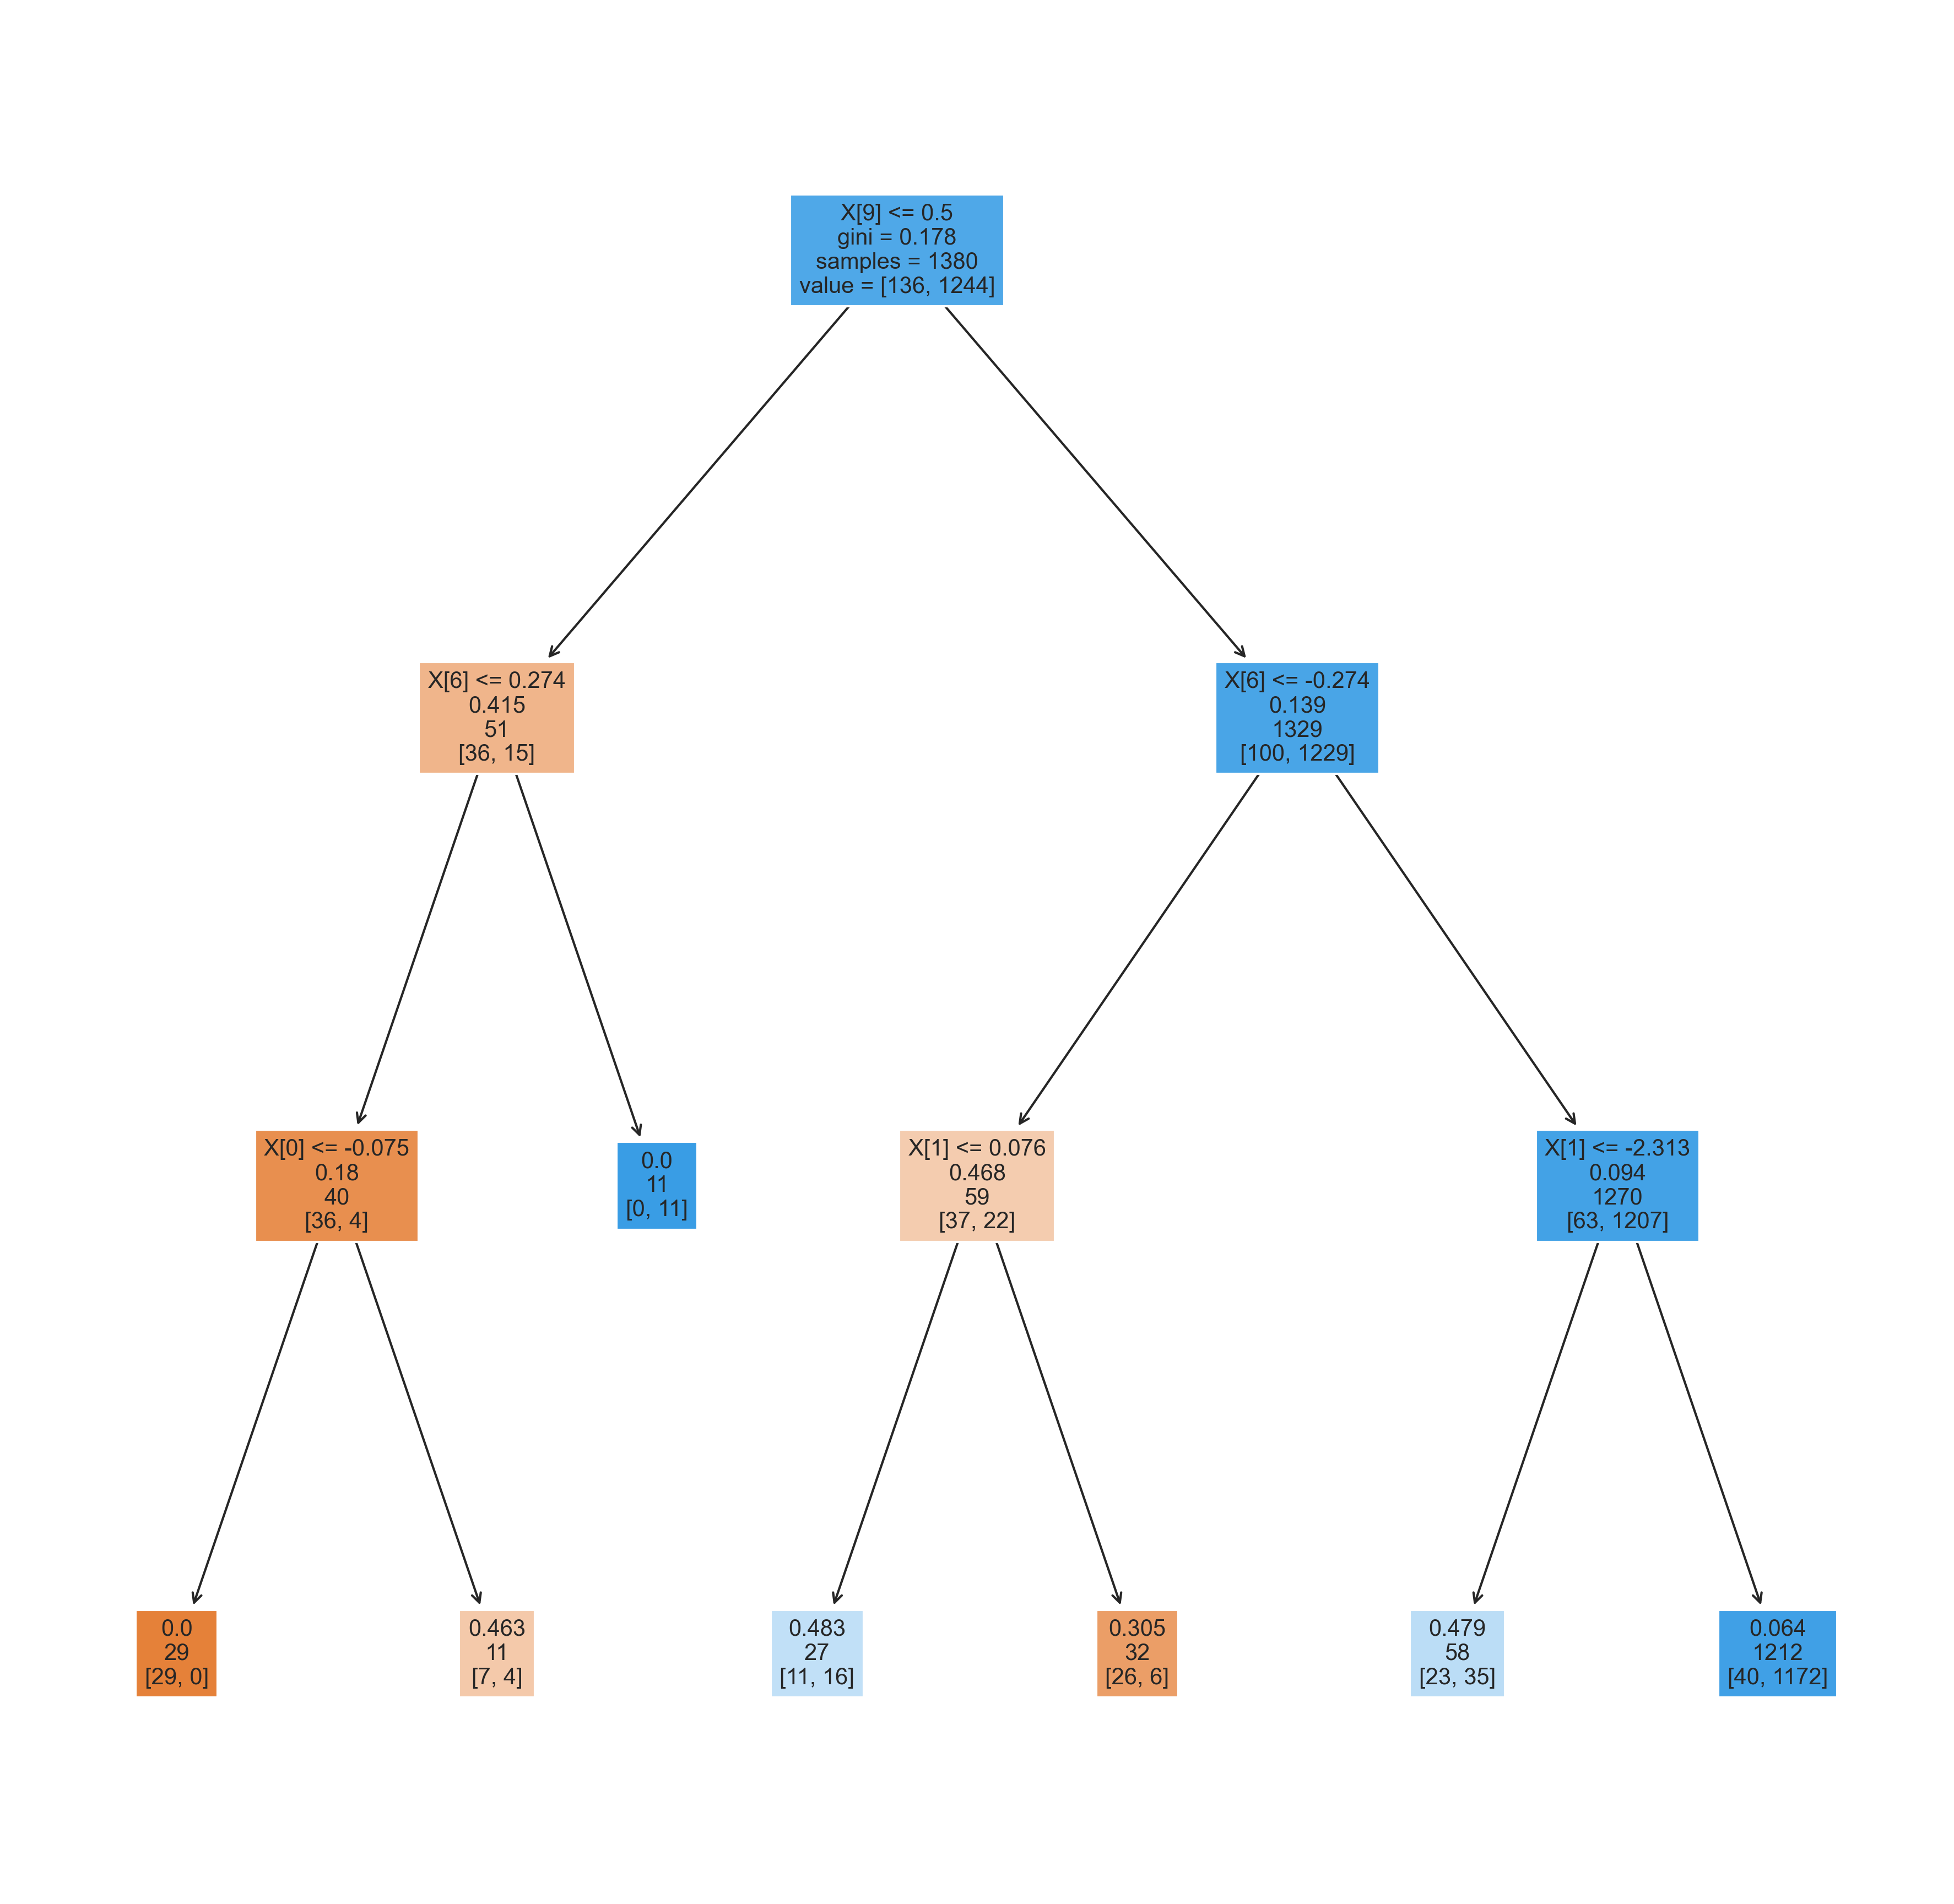

|--- Confirmed <= 0.50
|   |--- Population Density 2020 Census <= 0.27
|   |   |--- Active <= -0.08
|   |   |   |--- class: False
|   |   |--- Active >  -0.08
|   |   |   |--- class: False
|   |--- Population Density 2020 Census >  0.27
|   |   |--- class: True
|--- Confirmed >  0.50
|   |--- Population Density 2020 Census <= -0.27
|   |   |--- Incident_Rate <= 0.08
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  0.08
|   |   |   |--- class: False
|   |--- Population Density 2020 Census >  -0.27
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [55]:
max_depths = [3]
covid_col = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].join(covid[['Recovered', 'Confirmed']])).columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec4_tree = dec_tree.fit(x4,y4)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
    tree.plot_tree(dec4_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec4_tree, feature_names = covid_col.tolist())
    print(text_representation)

### Observations:

#### 1. From the above figure, we note that the root node splits on the number of confirmed cases. The split shows that for the left side of the root node the [confirmed] <= 0.5 whereas the right side of the root node has the confirmed count ratio greater than 0.5. We can also note that further split of the right side of the root node is on the basis of Population density (Population Density 2020 Census <= 0.27). This depicts a correlation between the number of confirmed cases and population density for each state.

#### 2. The node further gets divided on the basis of Active cases and Incident Rate. It shows that Population density and Active case count is correlated, as well as Incident_Rate and Population density are also directly correlated.

## Case Study 2: Decision Tree Classifier Using Hybrid Dataset (including PCA components)

### Case Study 2A: Assuming k= 5 for k-fold cross validation; and taking target label as 'Recovered'

RangeIndex(start=0, stop=5, step=1)
max_depth: 3 	Accuracy: 77.83%
max_depth: 5 	Accuracy: 84.20%
max_depth: 10 	Accuracy: 90.65%
max_depth: None 	Accuracy: 90.43%


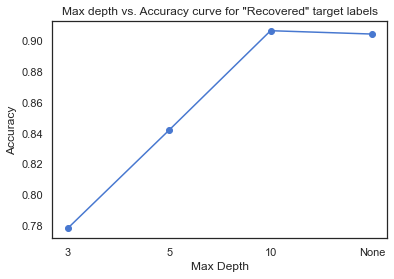

In [56]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
PCA_feature = pca_features_covid.iloc[:,0:5].columns
PCA_feature.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

print(PCA_feature)
x5 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']

y5 = covid['Recovered'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec5_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec5_tree, x5, y5, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Recovered" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 91.09% is obtained at max_depth = 10.

### Analysing the Decision Tree for "Recovered" target labels for Hybrid Covid Dataset and Max depth = 3

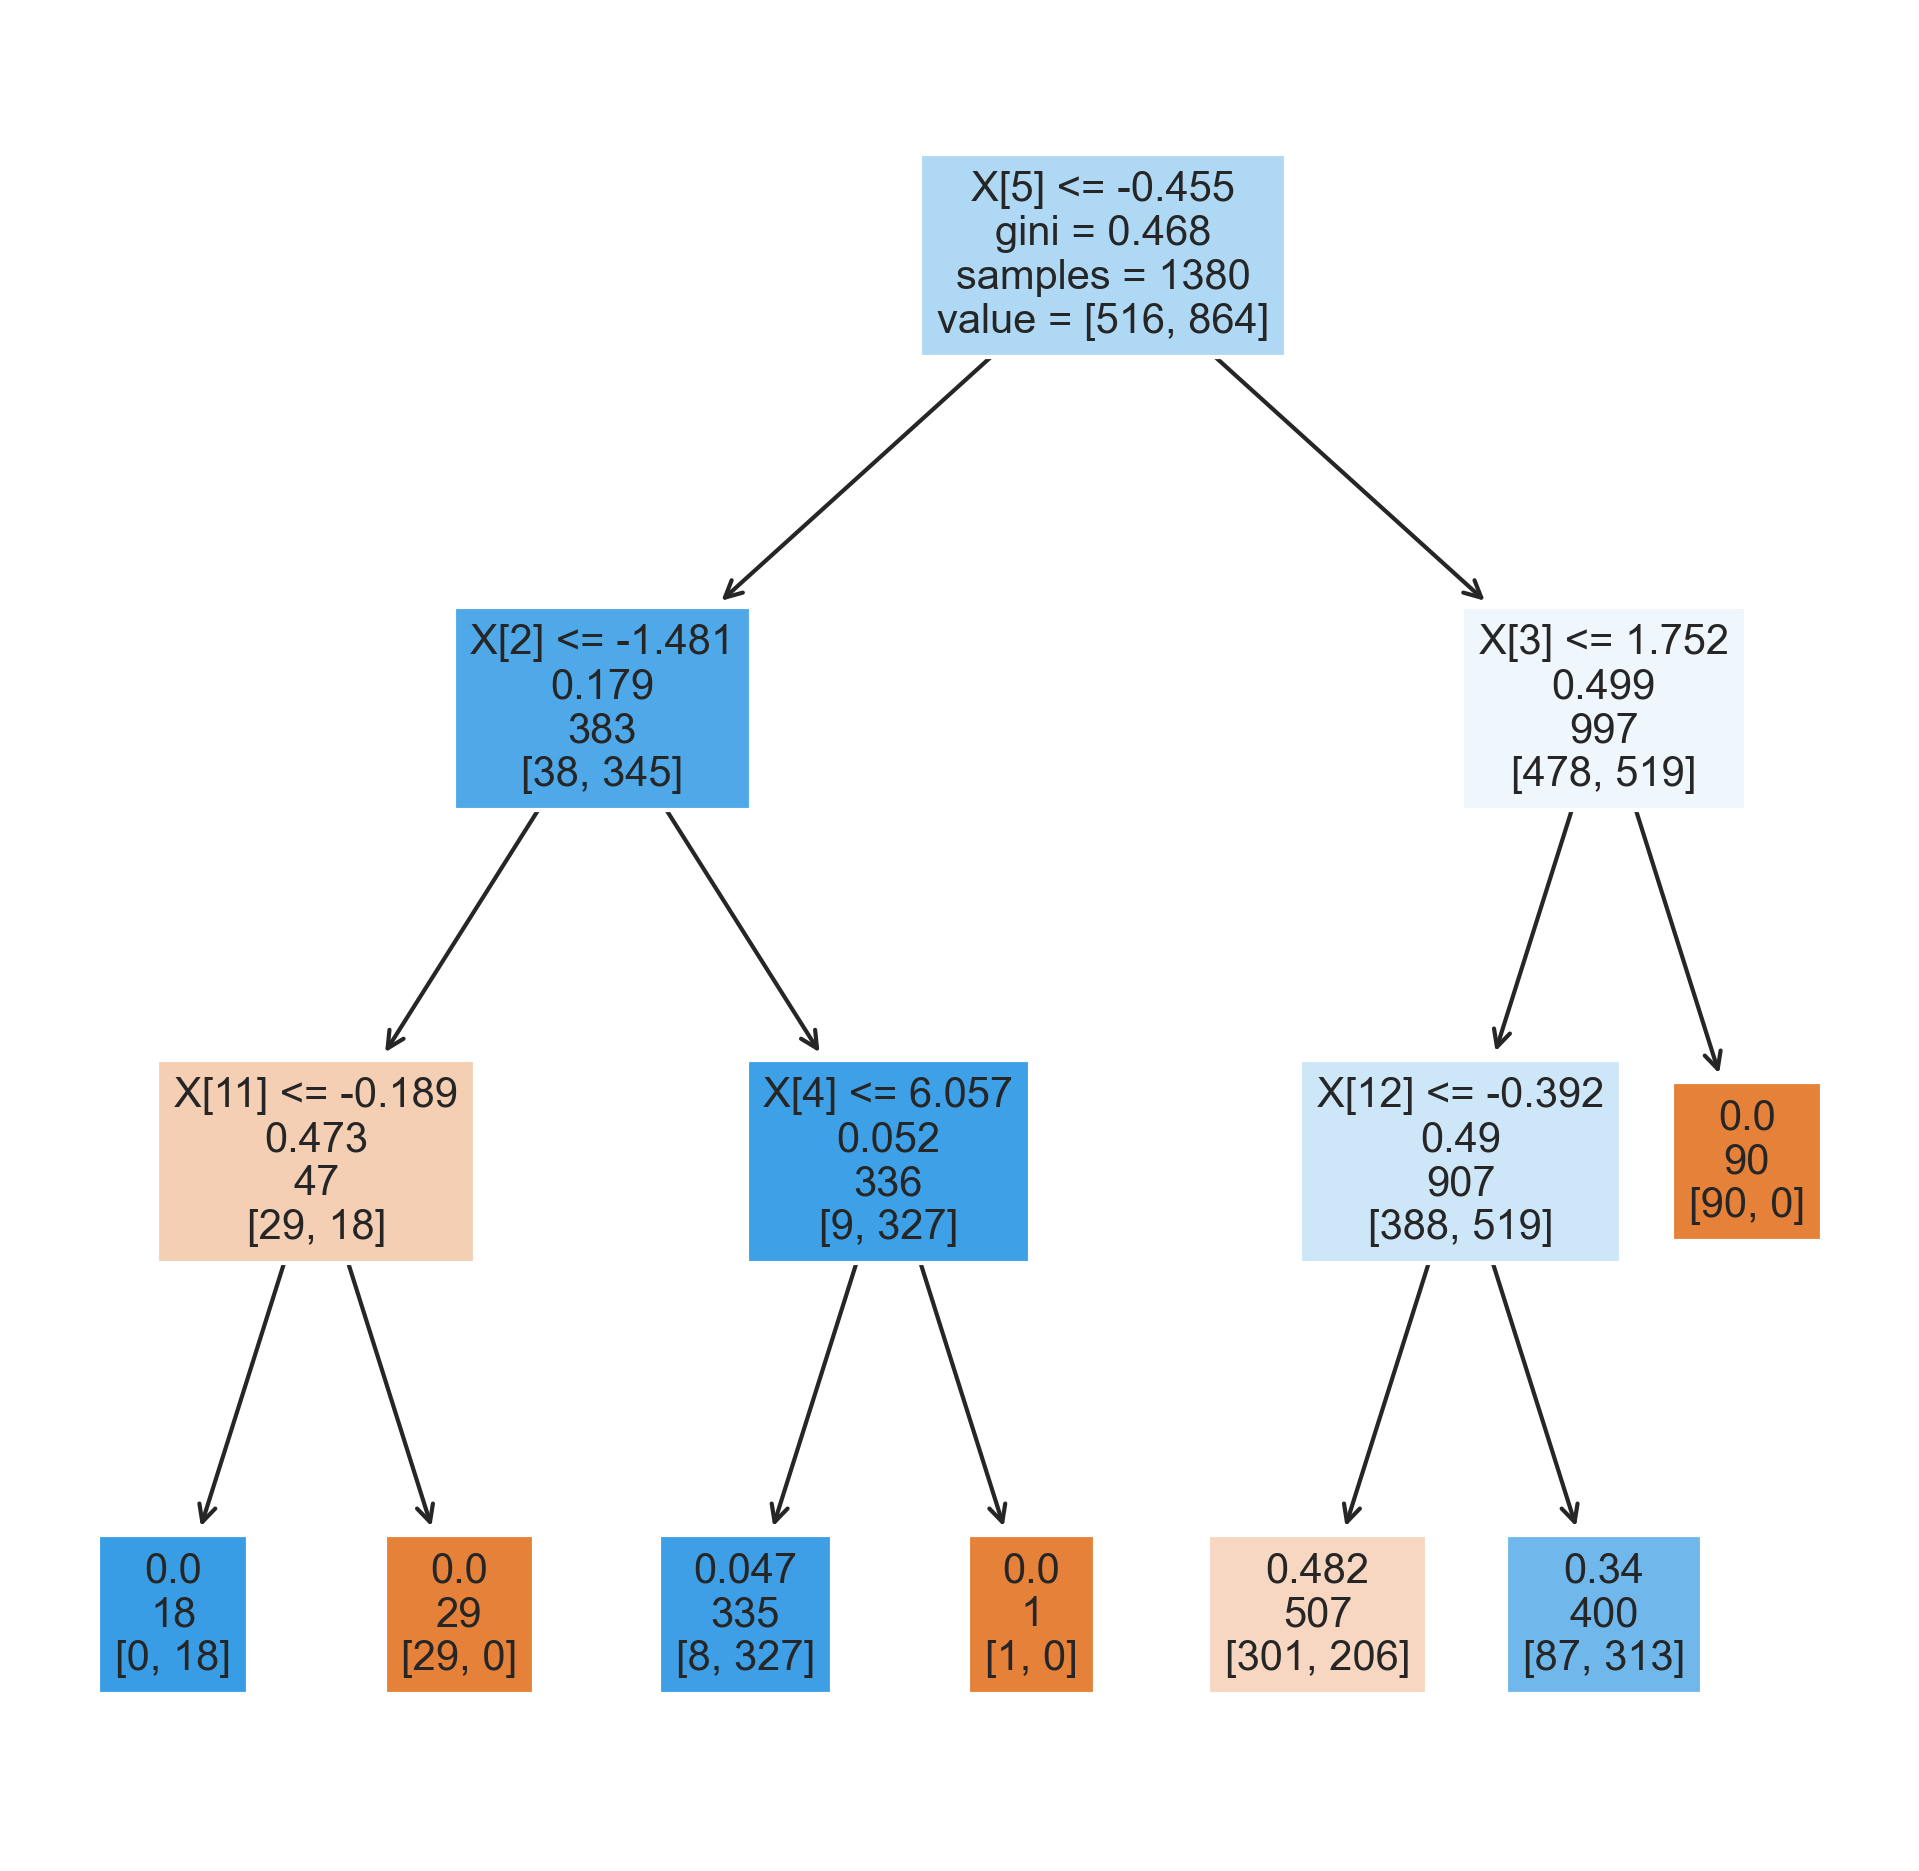

|--- Active <= -0.45
|   |--- PC3 <= -1.48
|   |   |--- Population Density 2020 Census <= -0.19
|   |   |   |--- class: True
|   |   |--- Population Density 2020 Census >  -0.19
|   |   |   |--- class: False
|   |--- PC3 >  -1.48
|   |   |--- PC5 <= 6.06
|   |   |   |--- class: True
|   |   |--- PC5 >  6.06
|   |   |   |--- class: False
|--- Active >  -0.45
|   |--- PC4 <= 1.75
|   |   |--- SexRatio <= -0.39
|   |   |   |--- class: False
|   |   |--- SexRatio >  -0.39
|   |   |   |--- class: True
|   |--- PC4 >  1.75
|   |   |--- class: False



In [57]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec5_tree = dec_tree.fit(x5,y5)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec5_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec5_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the target label ['Recovered'] for hybrid dataset

In [58]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x5 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x5, covid['Recovered'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [59]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9065217391304348

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Case Study 2B: Assuming k= 5 for k-fold cross validation; and taking target label as 'Deaths' for hybrid dataset

max_depth: 3 	Accuracy: 90.58%
max_depth: 5 	Accuracy: 90.00%
max_depth: 10 	Accuracy: 88.04%
max_depth: None 	Accuracy: 87.25%


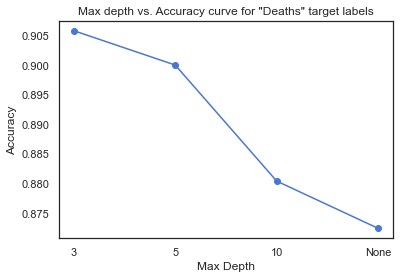

In [60]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x6 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y6 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec6_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec6_tree, x6, y6, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 91.38% is obtained at max_depth = 5.

### Analysing the Decision Tree for "Deaths" target labels for Hybrid Covid Dataset and Max depth = 3

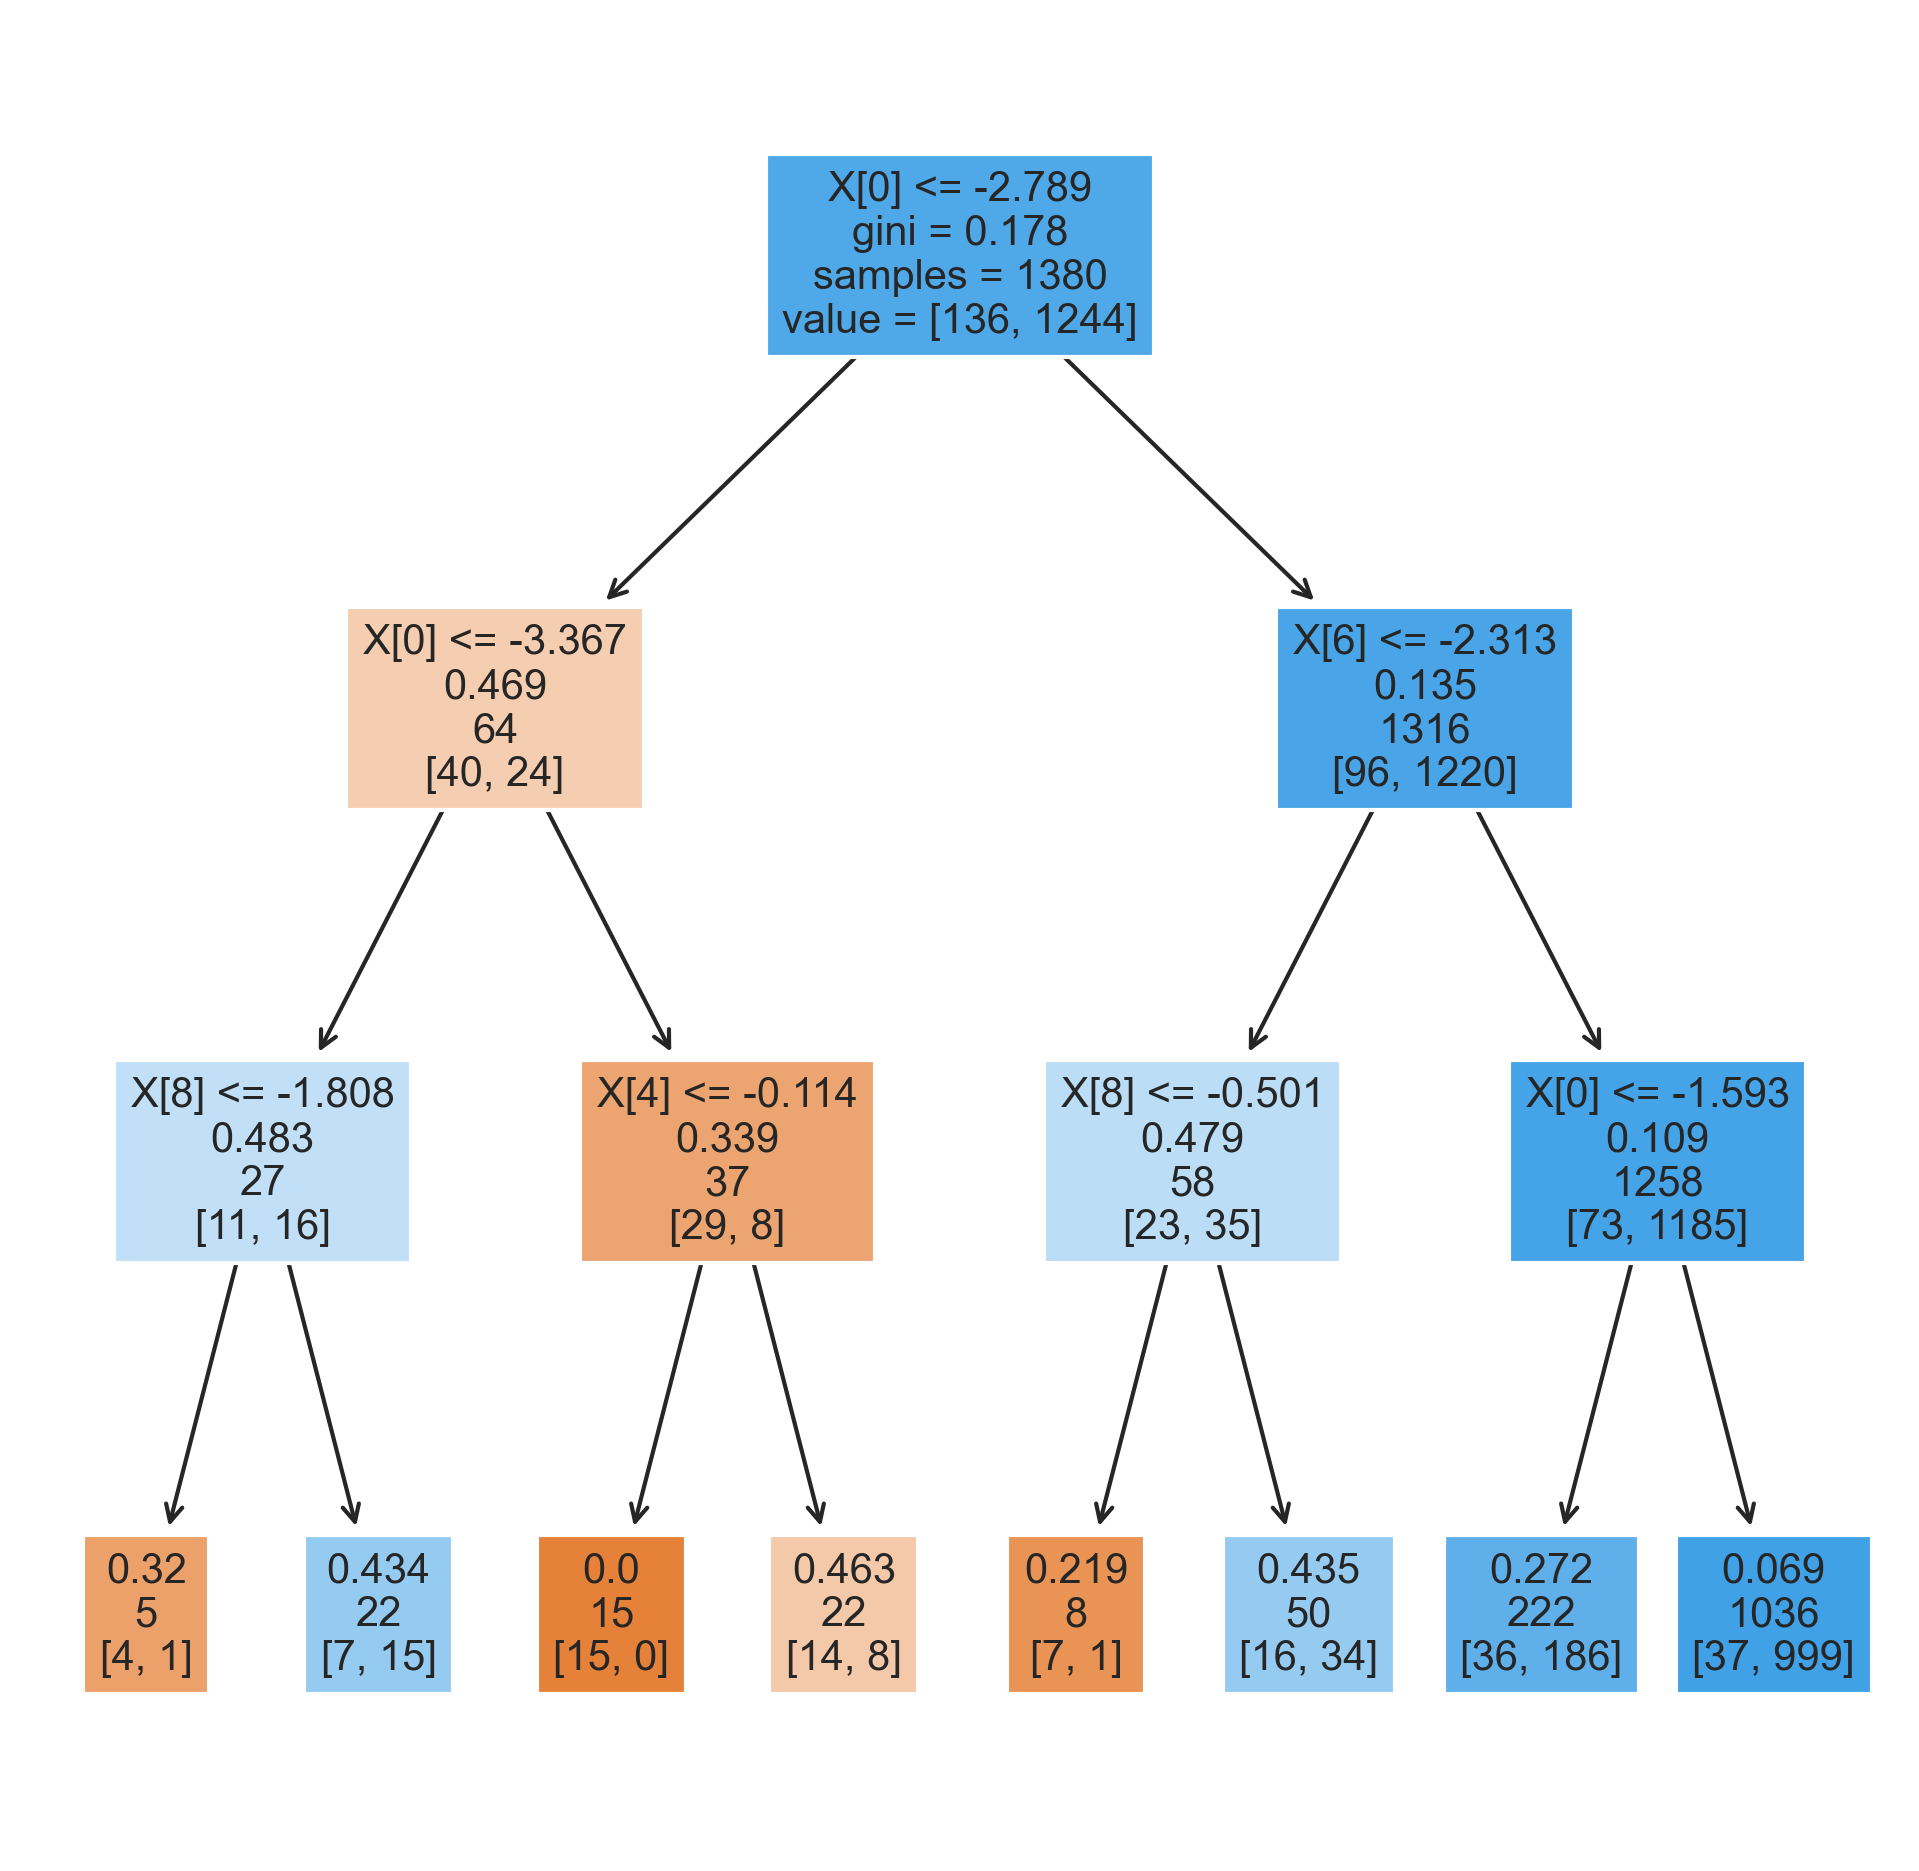

|--- PC1 <= -2.79
|   |--- PC1 <= -3.37
|   |   |--- Case_Fatality_Ratio <= -1.81
|   |   |   |--- class: False
|   |   |--- Case_Fatality_Ratio >  -1.81
|   |   |   |--- class: True
|   |--- PC1 >  -3.37
|   |   |--- PC5 <= -0.11
|   |   |   |--- class: False
|   |   |--- PC5 >  -0.11
|   |   |   |--- class: False
|--- PC1 >  -2.79
|   |--- Incident_Rate <= -2.31
|   |   |--- Case_Fatality_Ratio <= -0.50
|   |   |   |--- class: False
|   |   |--- Case_Fatality_Ratio >  -0.50
|   |   |   |--- class: True
|   |--- Incident_Rate >  -2.31
|   |   |--- PC1 <= -1.59
|   |   |   |--- class: True
|   |   |--- PC1 >  -1.59
|   |   |   |--- class: True



In [61]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec6_tree = dec_tree.fit(x6,y6)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec6_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec6_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the target label ['Deaths'] for hybrid dataset

In [62]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x6 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x6, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [63]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.910144927536232

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Case Study 2C: Assuming k= 5 for k-fold cross validation; and taking target label as 'Confirmed' for hybrid dataset

max_depth: 3 	Accuracy: 96.01%
max_depth: 5 	Accuracy: 95.07%
max_depth: 10 	Accuracy: 93.70%
max_depth: None 	Accuracy: 93.48%


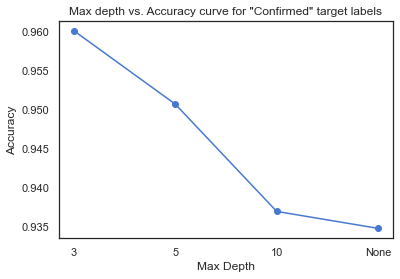

In [64]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x7 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x7.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y7 = covid['Confirmed'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec7_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec7_tree, x7, y7, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Confirmed" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 96.09% is obtained at max_depth = 3.

### Analysing the Decision Tree for all the target label [ 'Confirmed'] for Hybrid Covid Dataset and Max depth = 3¶

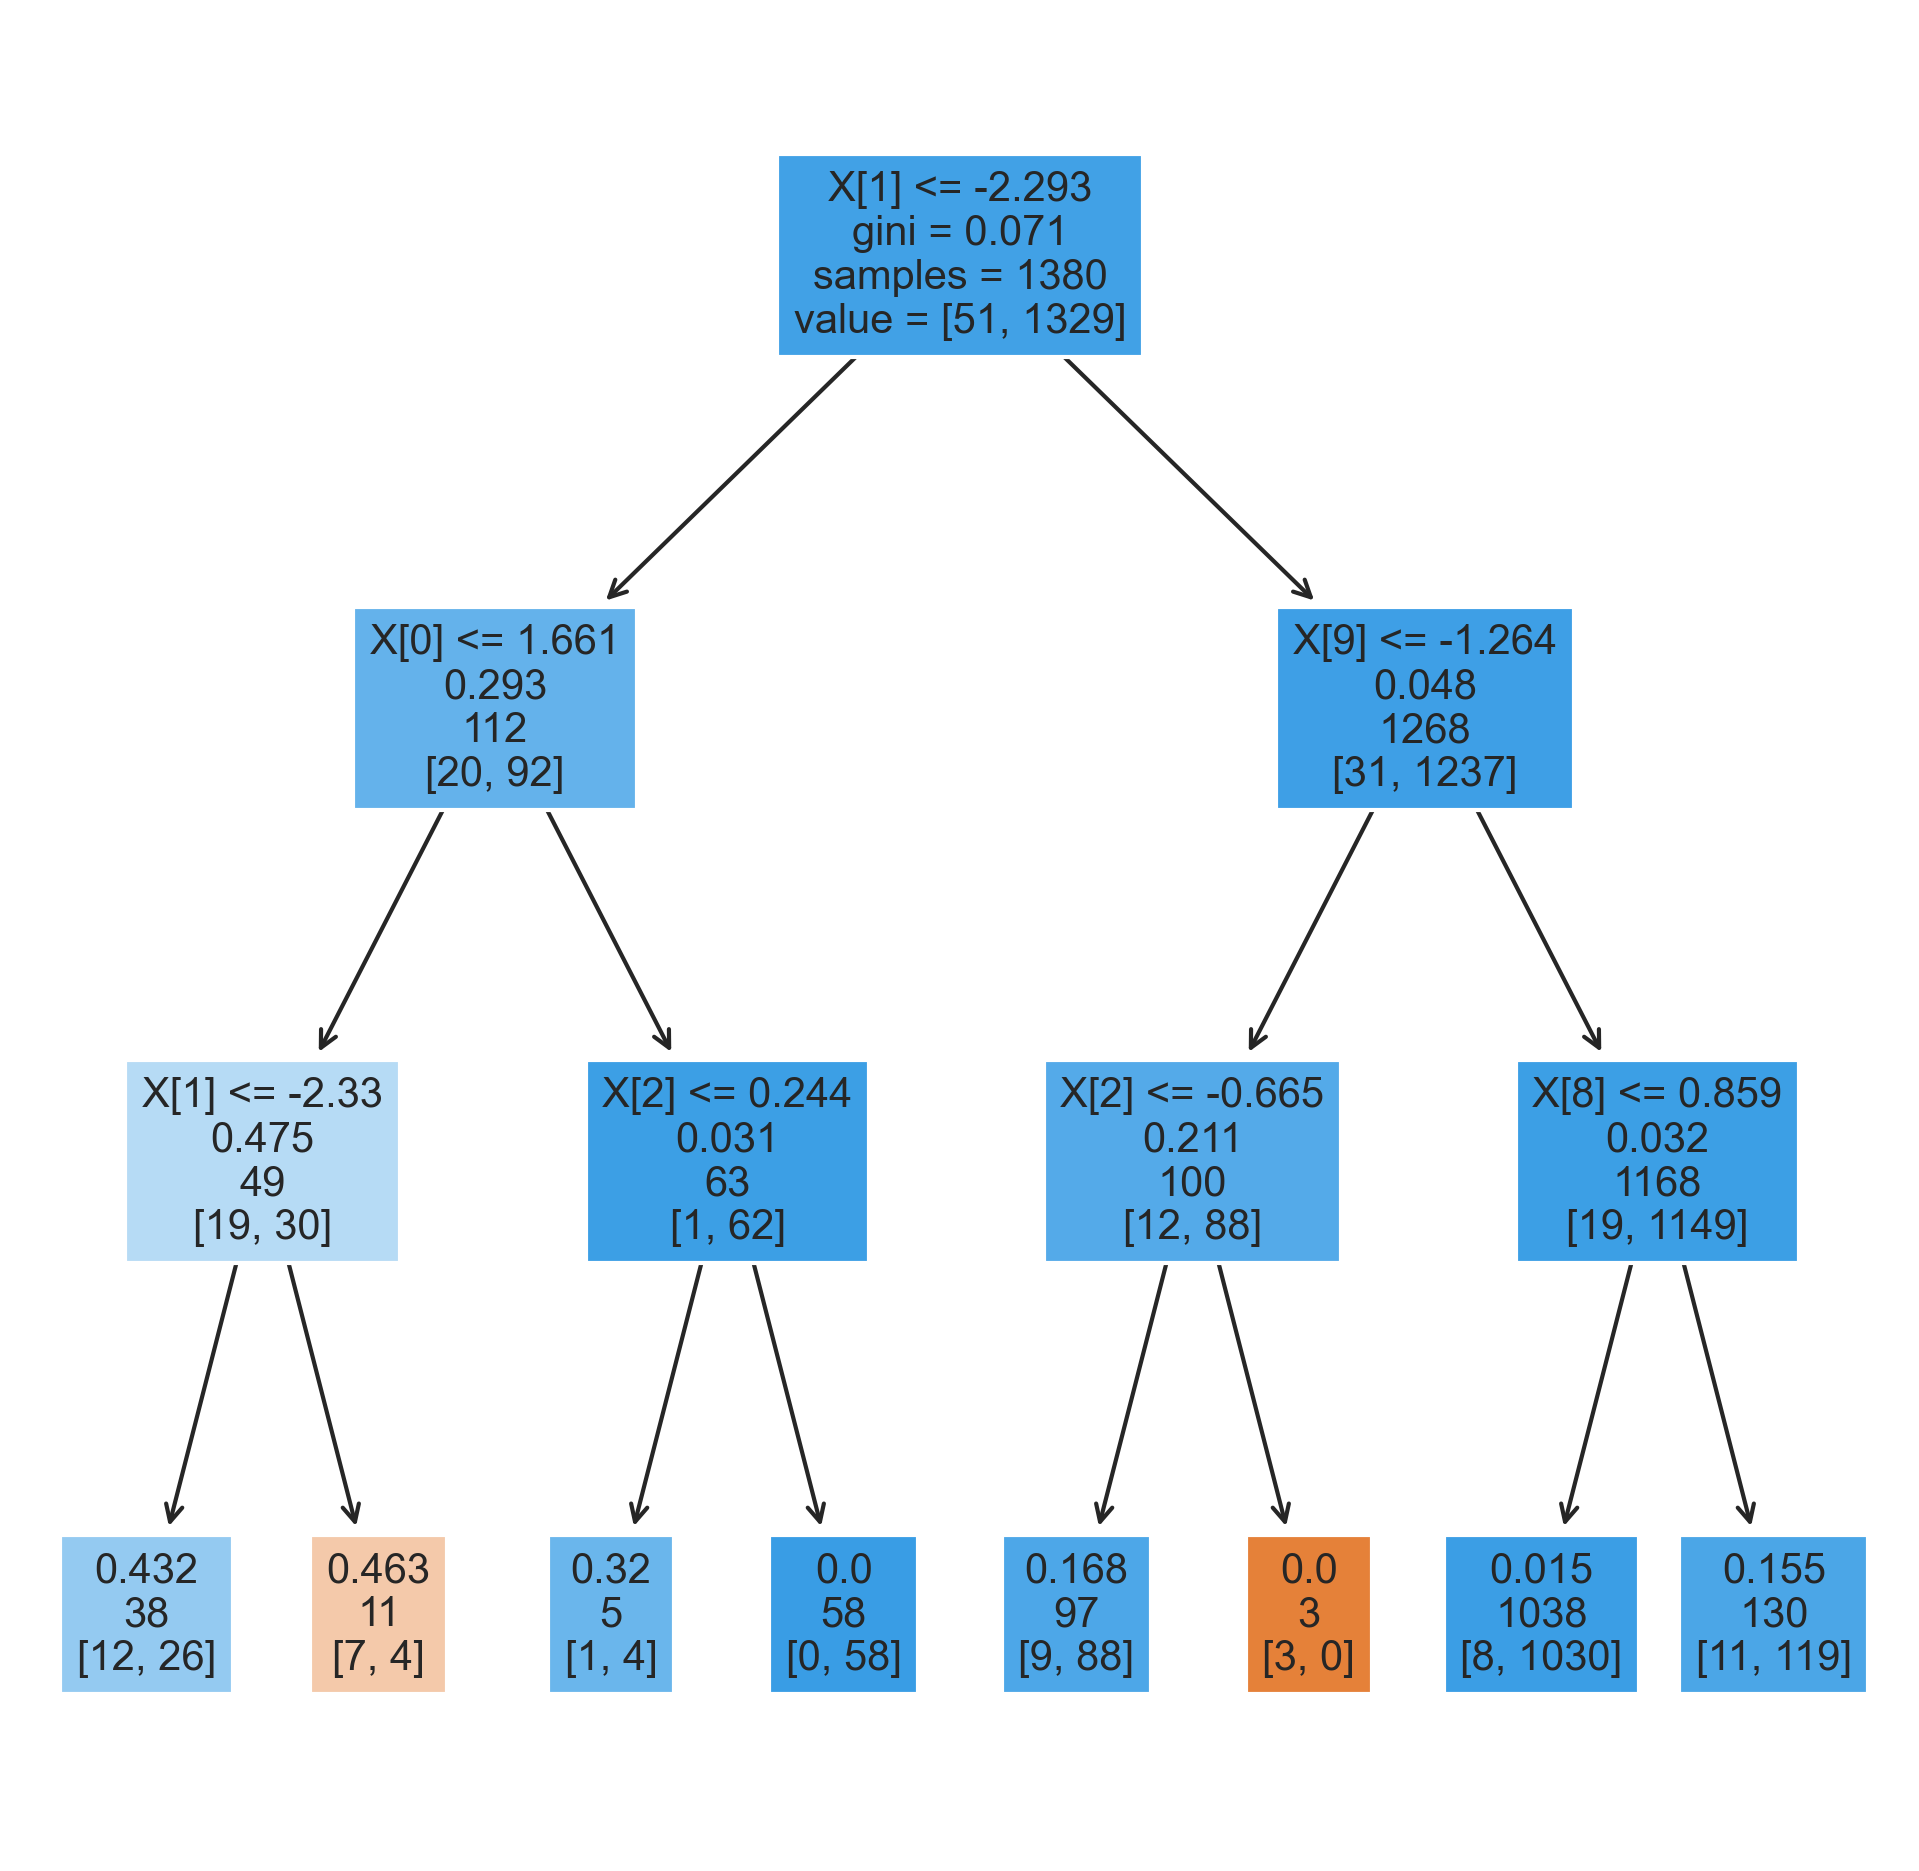

|--- PC2 <= -2.29
|   |--- PC1 <= 1.66
|   |   |--- PC2 <= -2.33
|   |   |   |--- class: True
|   |   |--- PC2 >  -2.33
|   |   |   |--- class: False
|   |--- PC1 >  1.66
|   |   |--- PC3 <= 0.24
|   |   |   |--- class: True
|   |   |--- PC3 >  0.24
|   |   |   |--- class: True
|--- PC2 >  -2.29
|   |--- Testing_Rate <= -1.26
|   |   |--- PC3 <= -0.67
|   |   |   |--- class: True
|   |   |--- PC3 >  -0.67
|   |   |   |--- class: False
|   |--- Testing_Rate >  -1.26
|   |   |--- Case_Fatality_Ratio <= 0.86
|   |   |   |--- class: True
|   |   |--- Case_Fatality_Ratio >  0.86
|   |   |   |--- class: True



In [65]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec7_tree = dec_tree.fit(x7,y7)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec7_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec7_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for the target label ['Confirmed'] for hybrid dataset

In [66]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x7 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x7.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x7, covid['Confirmed'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [67]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9623188405797102

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Case Study 2D: Assuming k= 5 for k-fold cross validation; and taking all the three target labels: 'Recovered', 'Confirmed' and 'Deaths'

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

max_depth: 3 	Accuracy: 93.26%
max_depth: 5 	Accuracy: 93.12%
max_depth: 10 	Accuracy: 91.16%
max_depth: None 	Accuracy: 90.80%


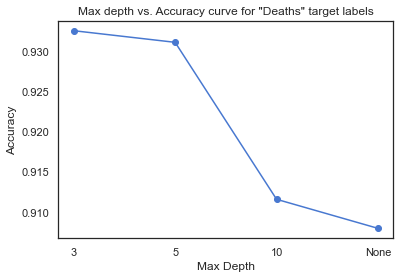

In [69]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x8 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']]).join(covid[['Recovered', 'Confirmed']])
x8.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio','Recovered', 'Confirmed']
y8 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec8_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec8_tree, x8, y8, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 93.48% is obtained at max_depth = 5. We also note that there is a relatively similar accuracy obtained at max_depth = 3.

### Analysing the Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Hybrid Covid Dataset and Max depth = 3

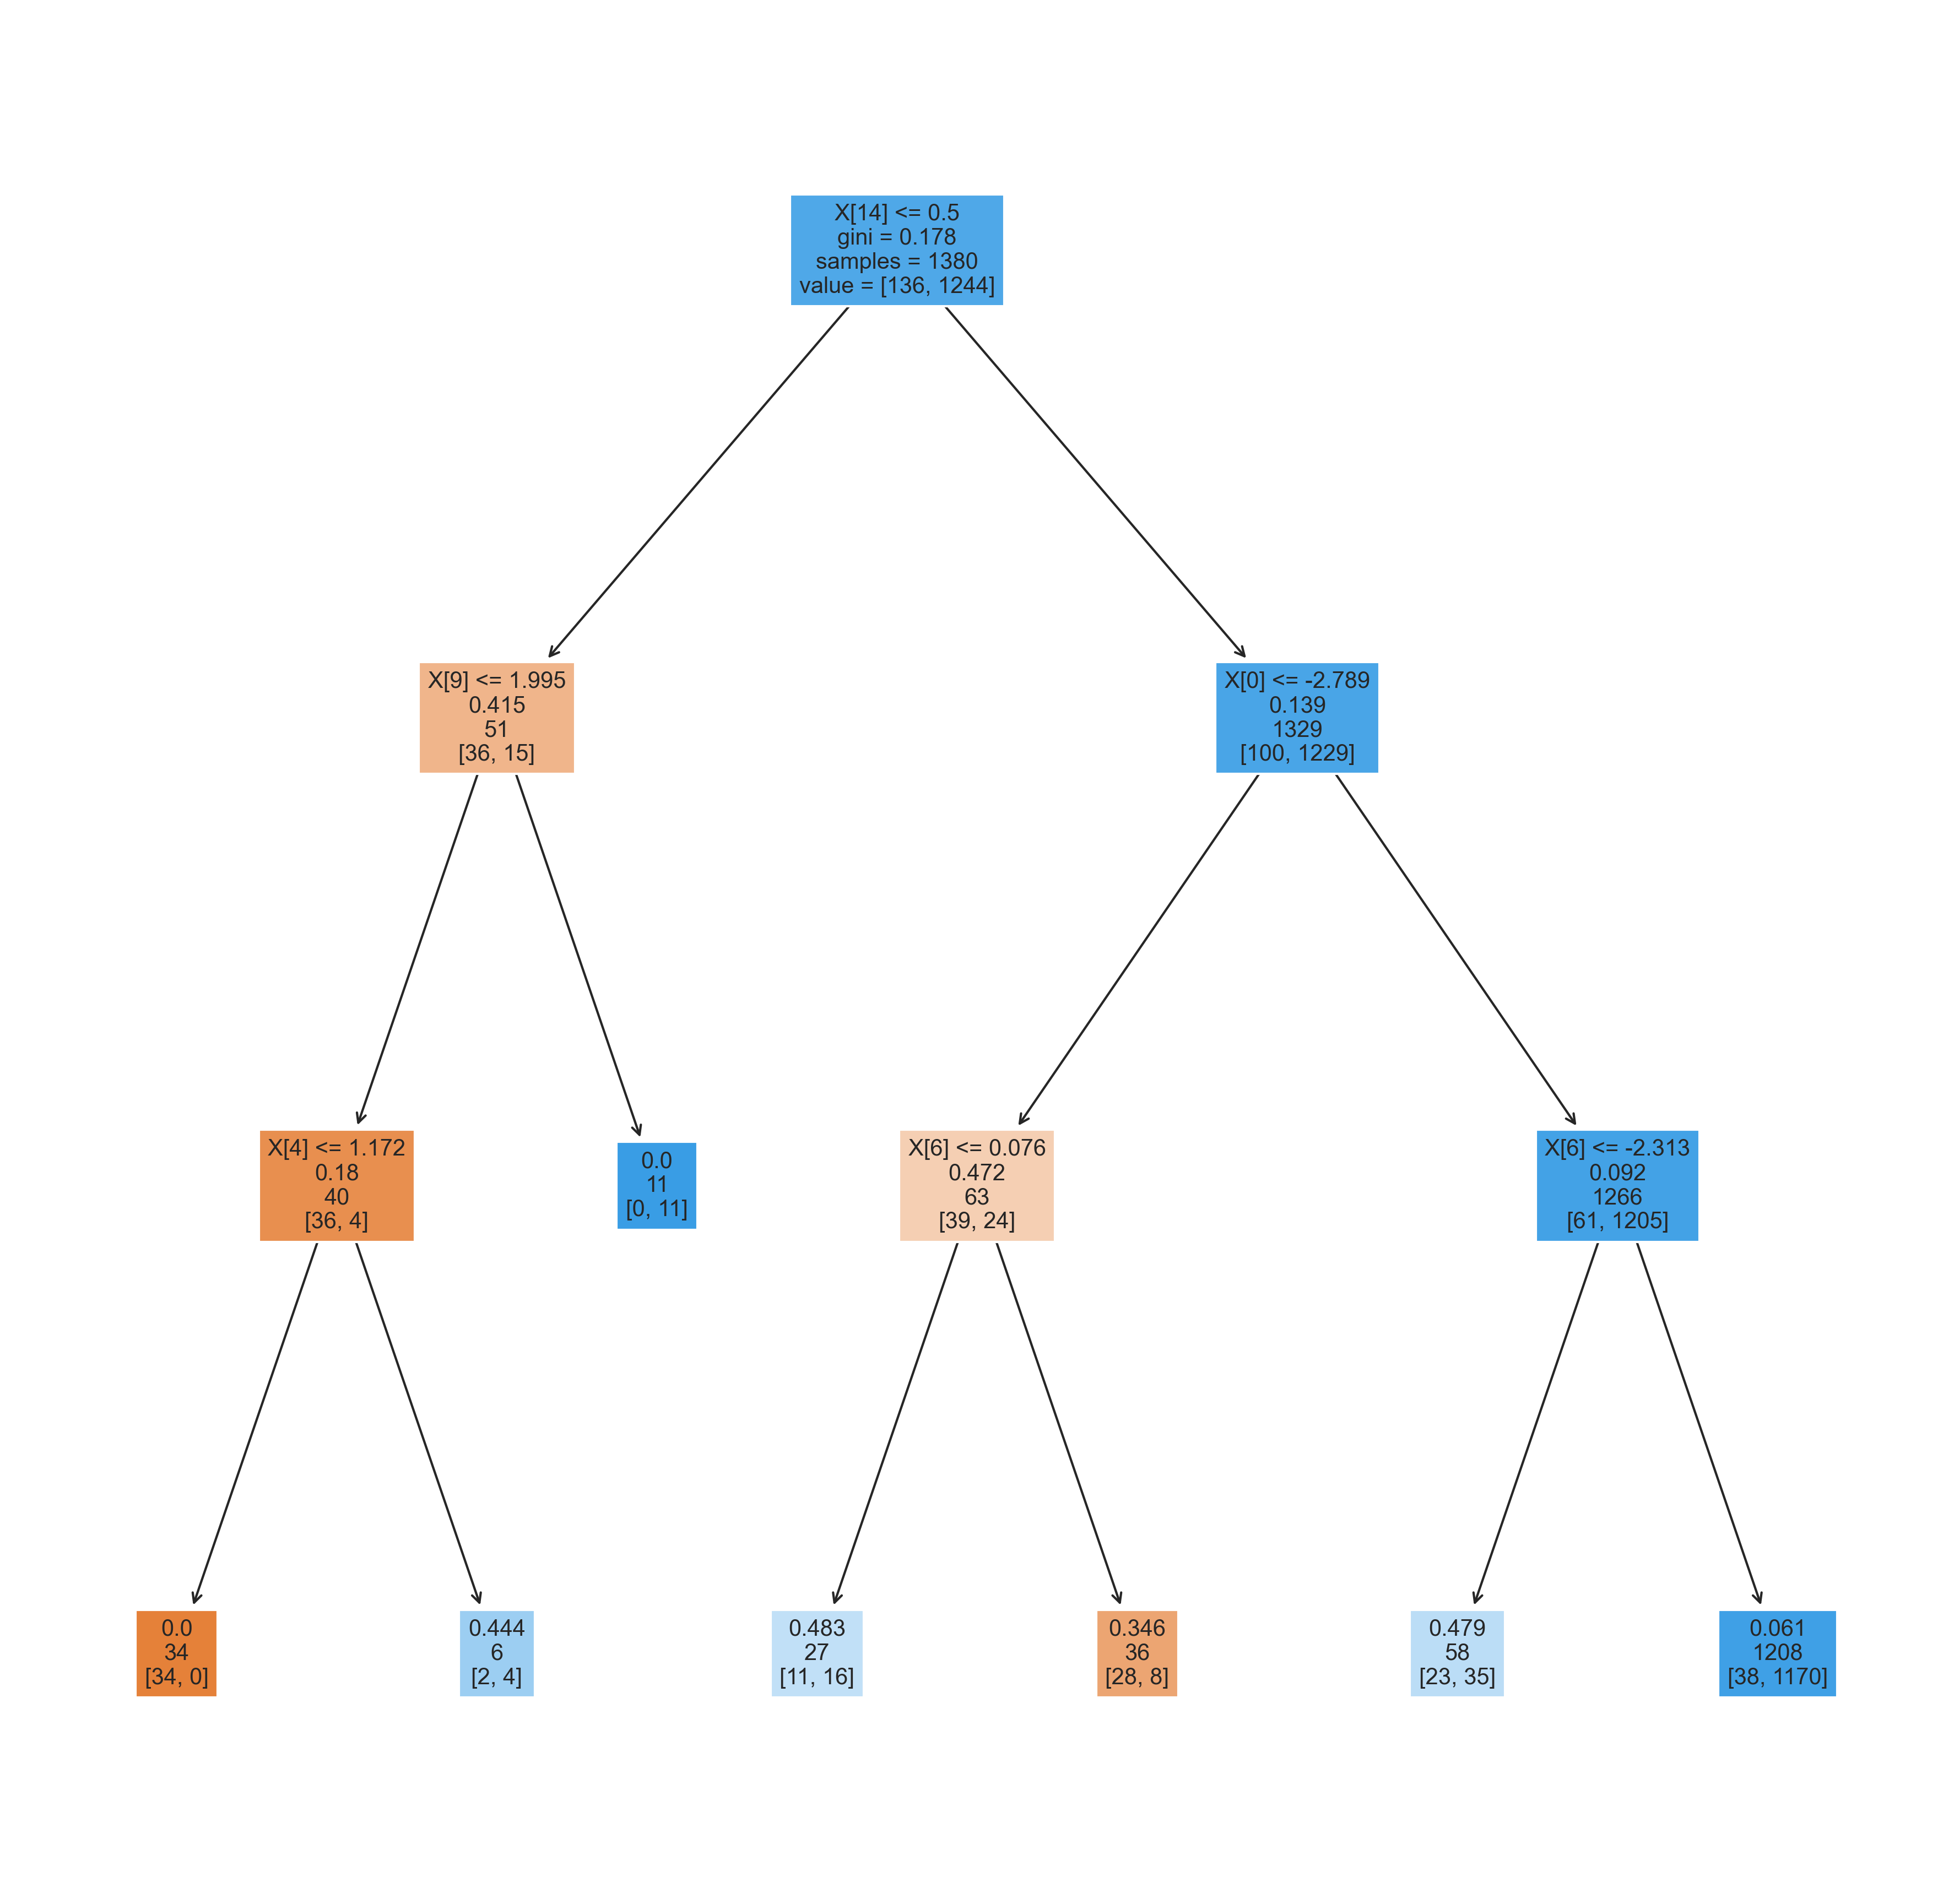

|--- Confirmed <= 0.50
|   |--- Testing_Rate <= 2.00
|   |   |--- PC5 <= 1.17
|   |   |   |--- class: False
|   |   |--- PC5 >  1.17
|   |   |   |--- class: True
|   |--- Testing_Rate >  2.00
|   |   |--- class: True
|--- Confirmed >  0.50
|   |--- PC1 <= -2.79
|   |   |--- Incident_Rate <= 0.08
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  0.08
|   |   |   |--- class: False
|   |--- PC1 >  -2.79
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [70]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']]).join(covid[['Recovered', 'Confirmed']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio','Recovered', 'Confirmed']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec8_tree = dec_tree.fit(x8,y8)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
    tree.plot_tree(dec8_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec8_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Hybrid Covid Dataset

In [71]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x8 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']]).join(covid[['Recovered', 'Confirmed']])
x8.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio','Recovered', 'Confirmed']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x8, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [72]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9311594202898551

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 3}

.........................

Optimum value of Max_depth 
 3


### Final Observations from Decision Tree Analysis:

#### 1. Any node gets divided into sub nodes with lower cumulative gini error.
#### 2. The tree depth contributes to the better performance.
#### 3. There is a correlation between Population density, Active cases, Case_Fatality_Ratio and Incident_Case as it shows in root nodes, and further sub nodes for decision tree.

# [CM4] Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

def TrainedRFOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print("Optimum value of Max_depth \n", grid.best_params_['max_depth'])
    print('Best No. of Trees \n', grid.best_params_['n_estimators'])

### Case Study 3: Using Original Covid Dataset 
### Case Study 3a: For class "Recovered"

num_trees: 5 	max_depth: 3 	Accuracy:74.93%
num_trees: 5 	max_depth: 5 	Accuracy:84.28%
num_trees: 5 	max_depth: 10 	Accuracy:92.17%
num_trees: 5 	max_depth: None 	Accuracy:92.03%
num_trees: 10 	max_depth: 3 	Accuracy:75.80%
num_trees: 10 	max_depth: 5 	Accuracy:85.80%
num_trees: 10 	max_depth: 10 	Accuracy:92.83%
num_trees: 10 	max_depth: None 	Accuracy:93.04%
num_trees: 50 	max_depth: 3 	Accuracy:75.65%
num_trees: 50 	max_depth: 5 	Accuracy:88.55%
num_trees: 50 	max_depth: 10 	Accuracy:93.19%
num_trees: 50 	max_depth: None 	Accuracy:93.19%
num_trees: 150 	max_depth: 3 	Accuracy:74.86%
num_trees: 150 	max_depth: 5 	Accuracy:90.51%
num_trees: 150 	max_depth: 10 	Accuracy:93.33%
num_trees: 150 	max_depth: None 	Accuracy:93.04%
num_trees: 200 	max_depth: 3 	Accuracy:74.28%
num_trees: 200 	max_depth: 5 	Accuracy:91.01%
num_trees: 200 	max_depth: 10 	Accuracy:93.26%
num_trees: 200 	max_depth: None 	Accuracy:92.97%


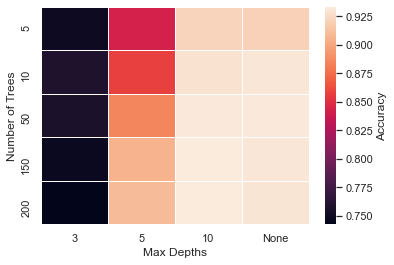

In [74]:
kFold = KFold(n_splits = 10, shuffle = True, random_state=0)
x9 = scaled_covid.values
y9 = covid['Recovered'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran1_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran1_forest, x9, y9, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 93.33% for "Recovered" class is observed at Maximum depth = 10,  and number of trees = 150 when we remove the longitude and latitude values from the covid features dataset. We also obtain relatively matching accuracy at Maximum depth = 10,  and number of trees = 50 and 200. 

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Recovered" class

In [75]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x9 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x9, covid['Recovered'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [76]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9391304347826086

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

.........................

Optimum value of Max_depth 
 10
Best No. of Trees 
 50


### Case Study 3b: For class "Deaths"

num_trees: 5 	max_depth: 3 	Accuracy:91.16%
num_trees: 5 	max_depth: 5 	Accuracy:91.30%
num_trees: 5 	max_depth: 10 	Accuracy:90.51%
num_trees: 5 	max_depth: None 	Accuracy:89.71%
num_trees: 10 	max_depth: 3 	Accuracy:91.45%
num_trees: 10 	max_depth: 5 	Accuracy:91.16%
num_trees: 10 	max_depth: 10 	Accuracy:91.01%
num_trees: 10 	max_depth: None 	Accuracy:89.86%
num_trees: 50 	max_depth: 3 	Accuracy:91.45%
num_trees: 50 	max_depth: 5 	Accuracy:91.23%
num_trees: 50 	max_depth: 10 	Accuracy:91.23%
num_trees: 50 	max_depth: None 	Accuracy:90.29%
num_trees: 150 	max_depth: 3 	Accuracy:91.45%
num_trees: 150 	max_depth: 5 	Accuracy:91.30%
num_trees: 150 	max_depth: 10 	Accuracy:91.09%
num_trees: 150 	max_depth: None 	Accuracy:90.51%
num_trees: 200 	max_depth: 3 	Accuracy:91.45%
num_trees: 200 	max_depth: 5 	Accuracy:91.23%
num_trees: 200 	max_depth: 10 	Accuracy:91.09%
num_trees: 200 	max_depth: None 	Accuracy:90.51%


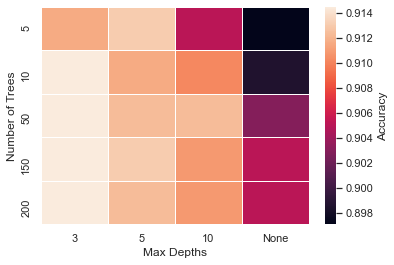

In [77]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x10 = scaled_covid.values
y10 = covid['Deaths'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran2_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran2_forest, x10, y10, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 91.45% for "Deaths" class is observed at Maximum depth = 3, and number of trees = 10, 50, 150 and 200 when we remove the longitude and latitude values from the covid features dataset. We can also note that the accuracy for reduced depth, such as max_depth = 5 and number of trees = 5, 10, 50, 150 and 200 are quite close to the highest accuracy as well. 

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Deaths" class

In [78]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x10 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x10, covid['Deaths'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [79]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9144927536231883

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}

.........................

Optimum value of Max_depth 
 3
Best No. of Trees 
 50


### Case Study 3c: For class "Confirmed"

num_trees: 5 	max_depth: 3 	Accuracy:96.30%
num_trees: 5 	max_depth: 5 	Accuracy:96.38%
num_trees: 5 	max_depth: 10 	Accuracy:96.16%
num_trees: 5 	max_depth: None 	Accuracy:95.58%
num_trees: 10 	max_depth: 3 	Accuracy:96.30%
num_trees: 10 	max_depth: 5 	Accuracy:96.30%
num_trees: 10 	max_depth: 10 	Accuracy:95.87%
num_trees: 10 	max_depth: None 	Accuracy:95.36%
num_trees: 50 	max_depth: 3 	Accuracy:96.30%
num_trees: 50 	max_depth: 5 	Accuracy:96.30%
num_trees: 50 	max_depth: 10 	Accuracy:95.94%
num_trees: 50 	max_depth: None 	Accuracy:95.65%
num_trees: 150 	max_depth: 3 	Accuracy:96.30%
num_trees: 150 	max_depth: 5 	Accuracy:96.30%
num_trees: 150 	max_depth: 10 	Accuracy:95.94%
num_trees: 150 	max_depth: None 	Accuracy:95.65%
num_trees: 200 	max_depth: 3 	Accuracy:96.30%
num_trees: 200 	max_depth: 5 	Accuracy:96.30%
num_trees: 200 	max_depth: 10 	Accuracy:96.01%
num_trees: 200 	max_depth: None 	Accuracy:95.72%


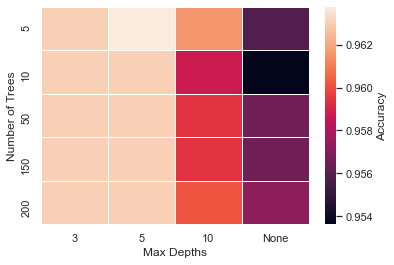

In [80]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x11 = scaled_covid.values
y11 = covid['Confirmed'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran3_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran3_forest, x11, y11, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 96.38% for "Confirmed" class is observed at Maximum depth = 5, and number of trees = 5; and at Maximum depth = 3 or 5 and number of trees = 5, 10, 50, 150, 200. 

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Confirmed" class

In [81]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x11 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x11, covid['Confirmed'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [82]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9637681159420289

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 5}

.........................

Optimum value of Max_depth 
 5
Best No. of Trees 
 5


### Case Study 4: Using Hybrid Covid Dataset (PCA Features for Classification, 5 Principal Components)

### Case Study 4a: For class "Recovered"

num_trees: 5 	max_depth: 3 	Accuracy:80.58%
num_trees: 5 	max_depth: 5 	Accuracy:90.14%
num_trees: 5 	max_depth: 10 	Accuracy:92.90%
num_trees: 5 	max_depth: None 	Accuracy:92.32%
num_trees: 10 	max_depth: 3 	Accuracy:79.57%
num_trees: 10 	max_depth: 5 	Accuracy:90.58%
num_trees: 10 	max_depth: 10 	Accuracy:92.83%
num_trees: 10 	max_depth: None 	Accuracy:92.32%
num_trees: 50 	max_depth: 3 	Accuracy:83.55%
num_trees: 50 	max_depth: 5 	Accuracy:92.03%
num_trees: 50 	max_depth: 10 	Accuracy:93.26%
num_trees: 50 	max_depth: None 	Accuracy:92.54%
num_trees: 150 	max_depth: 3 	Accuracy:83.48%
num_trees: 150 	max_depth: 5 	Accuracy:91.45%
num_trees: 150 	max_depth: 10 	Accuracy:93.33%
num_trees: 150 	max_depth: None 	Accuracy:93.04%
num_trees: 200 	max_depth: 3 	Accuracy:83.19%
num_trees: 200 	max_depth: 5 	Accuracy:91.38%
num_trees: 200 	max_depth: 10 	Accuracy:93.41%
num_trees: 200 	max_depth: None 	Accuracy:93.04%


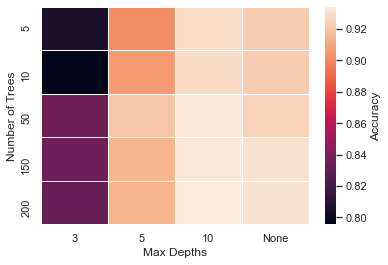

In [83]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x12 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x12.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y12 = covid['Recovered'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x12, y12, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 93.41% for "Recovered" class is observed at Maximum depth = 10, and number of trees = 150. We also observe that a relatively similar accuracy is obtained even at lower number of trees (5, 10 and 50) and maximum depth = 10 for "Recovered" class.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Recovered" class in Hybrid dataset

In [84]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x12 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x12.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x12, covid['Recovered'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [85]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9384057971014492

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}

.........................

Optimum value of Max_depth 
 10
Best No. of Trees 
 150


### Case Study 4b: For class "Deaths"

num_trees: 5 	max_depth: 3 	Accuracy:91.52%
num_trees: 5 	max_depth: 5 	Accuracy:91.01%
num_trees: 5 	max_depth: 10 	Accuracy:89.86%
num_trees: 5 	max_depth: None 	Accuracy:88.62%
num_trees: 10 	max_depth: 3 	Accuracy:91.30%
num_trees: 10 	max_depth: 5 	Accuracy:91.38%
num_trees: 10 	max_depth: 10 	Accuracy:89.64%
num_trees: 10 	max_depth: None 	Accuracy:88.91%
num_trees: 50 	max_depth: 3 	Accuracy:91.09%
num_trees: 50 	max_depth: 5 	Accuracy:90.94%
num_trees: 50 	max_depth: 10 	Accuracy:89.64%
num_trees: 50 	max_depth: None 	Accuracy:88.99%
num_trees: 150 	max_depth: 3 	Accuracy:91.01%
num_trees: 150 	max_depth: 5 	Accuracy:91.09%
num_trees: 150 	max_depth: 10 	Accuracy:89.86%
num_trees: 150 	max_depth: None 	Accuracy:89.35%
num_trees: 200 	max_depth: 3 	Accuracy:91.09%
num_trees: 200 	max_depth: 5 	Accuracy:91.09%
num_trees: 200 	max_depth: 10 	Accuracy:90.00%
num_trees: 200 	max_depth: None 	Accuracy:89.42%


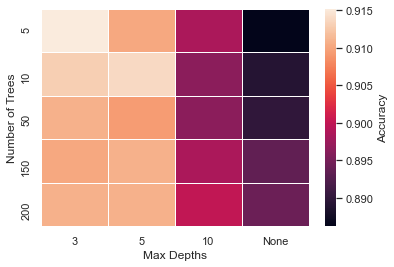

In [86]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x13 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x13.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y13 = covid['Deaths'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x13, y13, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 91.52% for "Deaths" class is observed at Maximum depth = 3, and number of trees = 5. We also observe that a relatively similar accuracy is obtained even at other number of trees (50, 150 and 200) and maximum depth = 3 and 5 for "Deaths" class.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Deaths" class in Hybrid dataset

In [87]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x13 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x13.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x13, covid['Deaths'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [88]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9144927536231883

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 150}

.........................

Optimum value of Max_depth 
 3
Best No. of Trees 
 150


### Case Study 4c: For class "Confirmed"

num_trees: 5 	max_depth: 3 	Accuracy:96.16%
num_trees: 5 	max_depth: 5 	Accuracy:95.87%
num_trees: 5 	max_depth: 10 	Accuracy:95.58%
num_trees: 5 	max_depth: None 	Accuracy:95.29%
num_trees: 10 	max_depth: 3 	Accuracy:96.23%
num_trees: 10 	max_depth: 5 	Accuracy:96.01%
num_trees: 10 	max_depth: 10 	Accuracy:94.93%
num_trees: 10 	max_depth: None 	Accuracy:94.86%
num_trees: 50 	max_depth: 3 	Accuracy:96.23%
num_trees: 50 	max_depth: 5 	Accuracy:96.23%
num_trees: 50 	max_depth: 10 	Accuracy:95.51%
num_trees: 50 	max_depth: None 	Accuracy:95.51%
num_trees: 150 	max_depth: 3 	Accuracy:96.30%
num_trees: 150 	max_depth: 5 	Accuracy:96.23%
num_trees: 150 	max_depth: 10 	Accuracy:95.43%
num_trees: 150 	max_depth: None 	Accuracy:95.43%
num_trees: 200 	max_depth: 3 	Accuracy:96.30%
num_trees: 200 	max_depth: 5 	Accuracy:96.23%
num_trees: 200 	max_depth: 10 	Accuracy:95.51%
num_trees: 200 	max_depth: None 	Accuracy:95.58%


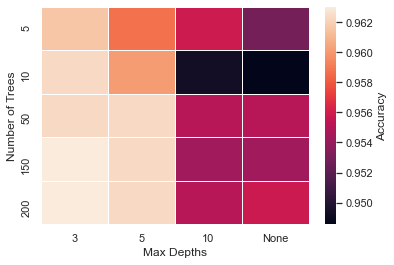

In [89]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x14 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x14.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y14 = covid['Confirmed'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x14, y14, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 96.23% for "Confirmed" class is observed at Maximum depth = 5, and number of trees = 10, 50 or 200. We also observe that a relatively similar accuracy is obtained even at other number of trees (5, 50, 150 and 200) and maximum depth = 3 and 5 for "Confirmed" class.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Confirmed" class in Hybrid dataset

In [90]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x14 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x14.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x14, covid['Confirmed'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [91]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9637681159420289

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}

.........................

Optimum value of Max_depth 
 3
Best No. of Trees 
 5


# [CM5] Gradient Tree Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

def TrainedGradBoostOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print('Best No. of Trees \n', grid.best_params_['n_estimators'])

### Case Study 5: Using Original Covid Dataset

### Case Study 5a: For class "Recovered"

num_estimators: 5 	Accuracy: 73.33%
num_estimators: 10 	Accuracy: 83.19%
num_estimators: 50 	Accuracy: 93.55%
num_estimators: 150 	Accuracy: 93.41%
num_estimators: 200 	Accuracy: 93.41%


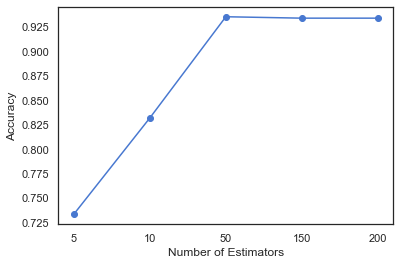

In [93]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x15 = scaled_covid.values
y15 = covid['Recovered'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad1_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad1_boost, x15, y15, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 93.55% is obtained at number of estimators = 50. We also observe, that there is a relatively matching accouracy at num_estimators: 150 and 200 as well.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Recovered" class

In [94]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x15 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x15, covid['Recovered'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [95]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9297101449275363

.........................

Optimum parameters 
 {'max_depth': 5, 'n_estimators': 50}

.........................

Best No. of Trees 
 50


### Case Study 5b: For class "Deaths"

num_estimators: 5 	Accuracy: 90.14%
num_estimators: 10 	Accuracy: 91.67%
num_estimators: 50 	Accuracy: 90.87%
num_estimators: 150 	Accuracy: 90.36%
num_estimators: 200 	Accuracy: 90.22%


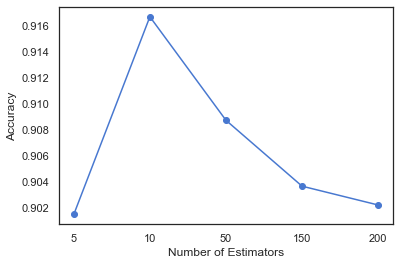

In [96]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x16 = scaled_covid.values
y16 = covid['Deaths'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad2_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad2_boost, x16, y16, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 91.67% is obtained at number of estimators = 10.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Deaths" class

In [97]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x16 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x16, covid['Deaths'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [98]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9094202898550725

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 10}

.........................

Best No. of Trees 
 10


### Case Study 5c: For class "Confirmed"

num_estimators: 5 	Accuracy: 96.16%
num_estimators: 10 	Accuracy: 96.09%
num_estimators: 50 	Accuracy: 95.51%
num_estimators: 150 	Accuracy: 95.43%
num_estimators: 200 	Accuracy: 95.43%


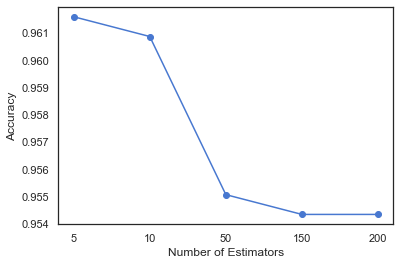

In [99]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x17 = scaled_covid.values
y17 = covid['Confirmed'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad3_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad3_boost, x17, y17, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 96.16% is obtained at number of estimators = 5. We also observe, that there is a relatively matching accouracy at num_estimators: 10 and 50 as well.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Confirmed" class

In [100]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x17 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x17, covid['Confirmed'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [101]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9630434782608696

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 5}

.........................

Best No. of Trees 
 5


## Case Study 6: Using Hybrid Covid Dataset (PCA Features for Classification, 5 Principal Components)

### Case Study 6a: For class "Recovered"

num_estimators: 5 	Accuracy: 71.67%
num_estimators: 10 	Accuracy: 83.48%
num_estimators: 50 	Accuracy: 93.26%
num_estimators: 150 	Accuracy: 92.90%
num_estimators: 200 	Accuracy: 92.75%


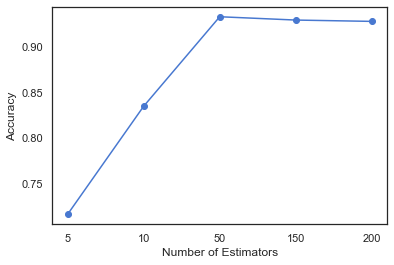

In [102]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x18 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x18.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y18 = covid['Recovered'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad4_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad4_boost, x18, y18, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 93.62% is obtained at number of estimators = 50. We also observe, that there is a relatively matching accouracy at num_estimators: 150 and 200 as well.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Recovered" class for Hybrid data

In [103]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x18 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x18.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x18, covid['Recovered'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [104]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9311594202898551

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 50}

.........................

Best No. of Trees 
 50


### Case Study 6b: For class "Deaths"

num_estimators: 5 	Accuracy: 90.29%
num_estimators: 10 	Accuracy: 91.01%
num_estimators: 50 	Accuracy: 90.43%
num_estimators: 150 	Accuracy: 89.49%
num_estimators: 200 	Accuracy: 89.35%


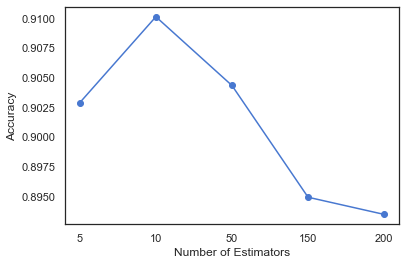

In [105]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x19 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x19.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y19 = covid['Deaths'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad5_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad5_boost, x19, y19, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 90.94% is obtained at number of estimators = 10.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Deaths" class for Hybrid data

In [106]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x19 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x19.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x19, covid['Deaths'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [107]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9043478260869566

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 10}

.........................

Best No. of Trees 
 10


### Case Study 6c: For class "Confirmed"

num_estimators: 5 	Accuracy: 96.30%
num_estimators: 10 	Accuracy: 96.16%
num_estimators: 50 	Accuracy: 95.65%
num_estimators: 150 	Accuracy: 94.71%
num_estimators: 200 	Accuracy: 94.78%


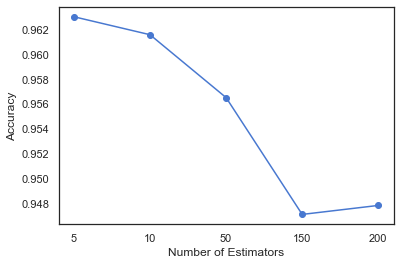

In [108]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x20 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x20.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
y20 = covid['Confirmed'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad6_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad6_boost, x20, y20, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 96.09% is obtained at number of estimators = 5 and 10.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Confirmed" class for Hybrid data

In [109]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x20 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']])
x20.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x20, covid['Confirmed'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [110]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9630434782608696

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 5}

.........................

Best No. of Trees 
 5


# [CM6] Naive Bayes Classifier

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

### Case Study 7a: For class "Recovered"

var_smoothing: 1e-10 	Accuracy: 87.61%
var_smoothing: 1e-09 	Accuracy: 87.68%
var_smoothing: 1e-05 	Accuracy: 90.65%
var_smoothing: 0.001 	Accuracy: 92.97%
var_smoothing: 0.1 	Accuracy: 93.62%


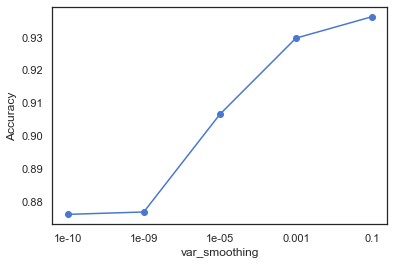

In [112]:
kFold = KFold(n_splits = 10, shuffle = True,random_state=0 )
x21 = scaled_covid.values
y21 = covid['Recovered'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x21, y21, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of 93.62% with variance smoothing value of 0.1 when we exclude longitude and latitidue features. We also note that there is a relatively matching accuracy at with variance smoothing value of 0.001

### Case Study 7b: For class "Deaths"

var_smoothing: 1e-10 	Accuracy: 58.84%
var_smoothing: 1e-09 	Accuracy: 58.84%
var_smoothing: 1e-05 	Accuracy: 58.84%
var_smoothing: 0.001 	Accuracy: 61.45%
var_smoothing: 0.1 	Accuracy: 69.78%


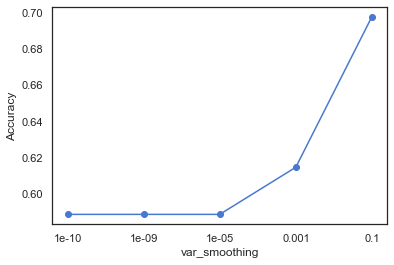

In [113]:
kFold = KFold(n_splits = 10, shuffle = True,random_state=0)
x22 = scaled_covid.values
y22 = covid['Deaths'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x22, y22, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of 69.78% with variance smoothing value of 0.1 when we exclude longitude and latitidue features.

### Case Study 7c: For class "Confirmed"

var_smoothing: 1e-10 	Accuracy: 89.78%
var_smoothing: 1e-09 	Accuracy: 90.14%
var_smoothing: 1e-05 	Accuracy: 89.71%
var_smoothing: 0.001 	Accuracy: 89.71%
var_smoothing: 0.1 	Accuracy: 90.07%


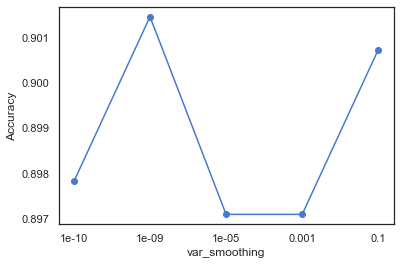

In [114]:
kFold = KFold(n_splits = 10, shuffle = True)
x23 = scaled_covid.values
y23 = covid['Confirmed'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x23, y23, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of around 90% with variance smoothing value of 0.001 when we exclude longitude and latitidue features. We also note that the accuracy values are relatively similar for var_smoothing value 0.1.

### Explanation: Impact of the smoothing parameter

#### We note from the above graphs that the covid dataset classification performance improves as we increase the var_smoothing parameter value. One exception is the "Confirmed" label where the performance slightly increases first and then decreases as the var_smoothing parameter increases. This shows that as the var_smoothing value increases, it smoothens the curve and also takes into account those samples which are farther from the distribution mean. We also know that Gaussian Naive Bayes works well for the ordinal datatypes and those features that could be fit into a gaussian distribution, thus these features work fairly well when compared to one-hot encoded and catagorical attributes.

### [CM7] Interpretability

### Case Study 8a: For Class "Recovered"

Accuracy: 0.9456521739130435
              precision    recall  f1-score   support

       False       0.92      0.94      0.93       106
        True       0.96      0.95      0.96       170

    accuracy                           0.95       276
   macro avg       0.94      0.95      0.94       276
weighted avg       0.95      0.95      0.95       276



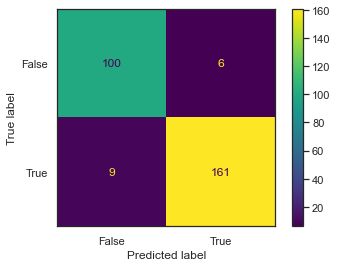

In [115]:
from sklearn import metrics
# Gradient Boost Classifier
x24_train, x24_test ,y24_train, y24_test = train_test_split(scaled_covid, covid['Recovered'], test_size=0.2,random_state=22, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x24_train.values, y24_train.values)
y24_pred = naive_model.predict(x24_test.values)
print('Accuracy:', metrics.accuracy_score(y24_test.values,y24_pred))
metrics.plot_confusion_matrix(naive_model, x24_test, y24_test)
print(metrics.classification_report(y24_test,y24_pred))



Accuracy: 0.9311594202898551
              precision    recall  f1-score   support

       False       0.93      0.89      0.91       106
        True       0.93      0.96      0.94       170

    accuracy                           0.93       276
   macro avg       0.93      0.92      0.93       276
weighted avg       0.93      0.93      0.93       276



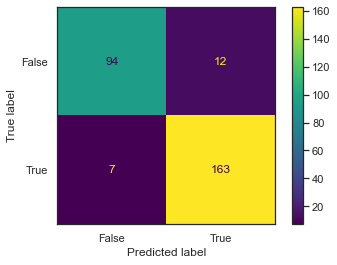

In [116]:
# Descison Tree Classifier
x25_train, x25_test ,y25_train, y25_test = train_test_split(scaled_covid, covid['Recovered'], test_size=0.2,random_state=22, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree_model.fit(x25_train, y25_train)
y25_pred = dtree_model.predict(x25_test)
print('\n\nAccuracy:', metrics.accuracy_score(y25_test,y25_pred))
metrics.plot_confusion_matrix(dtree_model, x25_test, y25_test)
print(metrics.classification_report(y25_test,y25_pred))

### Case Study 8b: For class "Deaths"

Accuracy: 0.6920289855072463
              precision    recall  f1-score   support

       False       0.27      0.94      0.41        32
        True       0.99      0.66      0.79       244

    accuracy                           0.69       276
   macro avg       0.63      0.80      0.60       276
weighted avg       0.90      0.69      0.75       276



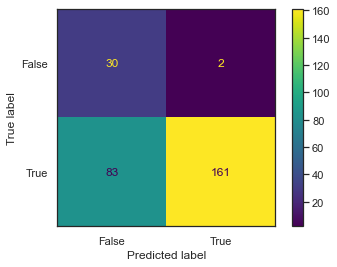

In [117]:
# Gradient Boost Classifier
x26_train, x26_test ,y26_train, y26_test = train_test_split(scaled_covid, covid['Deaths'], test_size=0.2,random_state=22, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x26_train.values, y26_train.values)
y26_pred = naive_model.predict(x26_test.values)
print('Accuracy:', metrics.accuracy_score(y26_test.values,y26_pred))
metrics.plot_confusion_matrix(naive_model, x26_test, y26_test)
print(metrics.classification_report(y26_test,y26_pred))



Accuracy: 0.8731884057971014
              precision    recall  f1-score   support

       False       0.36      0.12      0.19        32
        True       0.89      0.97      0.93       244

    accuracy                           0.87       276
   macro avg       0.63      0.55      0.56       276
weighted avg       0.83      0.87      0.84       276



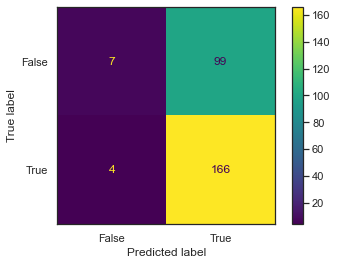

In [118]:
# Decision Tree Classifier
x27_train, x27_test ,y27_train, y27_test = train_test_split(scaled_covid, covid['Deaths'], test_size=0.2,random_state=22, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_model.fit(x27_train, y27_train)
y27_pred = dtree_model.predict(x27_test)
print('\n\nAccuracy:', metrics.accuracy_score(y27_test,y27_pred))
metrics.plot_confusion_matrix(dtree_model, x27_test, y25_test)
print(metrics.classification_report(y27_test,y27_pred))

### Case Study 8c: For class "Confirmed"

Accuracy: 0.9094202898550725
              precision    recall  f1-score   support

       False       0.28      0.82      0.42        11
        True       0.99      0.91      0.95       265

    accuracy                           0.91       276
   macro avg       0.64      0.87      0.68       276
weighted avg       0.96      0.91      0.93       276



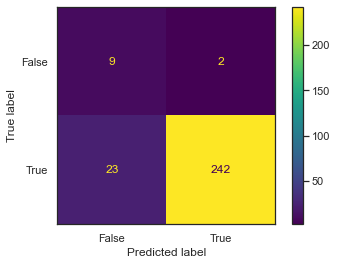

In [119]:
# Gradient Boosting Classifier
x28_train, x28_test ,y28_train, y28_test = train_test_split(scaled_covid, covid['Confirmed'], test_size=0.2,random_state=22, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x28_train.values, y28_train.values)
y28_pred = naive_model.predict(x28_test.values)
print('Accuracy:', metrics.accuracy_score(y28_test.values,y28_pred))
metrics.plot_confusion_matrix(naive_model, x28_test, y28_test)
print(metrics.classification_report(y28_test,y28_pred))



Accuracy: 0.9637681159420289
              precision    recall  f1-score   support

       False       1.00      0.09      0.17        11
        True       0.96      1.00      0.98       265

    accuracy                           0.96       276
   macro avg       0.98      0.55      0.57       276
weighted avg       0.97      0.96      0.95       276



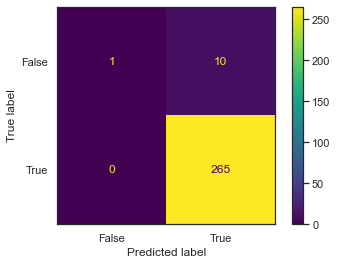

In [120]:
# Decision Tree Classifier
x29_train, x29_test ,y29_train, y29_test = train_test_split(scaled_covid, covid['Confirmed'], test_size=0.2,random_state=22, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_model.fit(x29_train, y29_train)
y29_pred = dtree_model.predict(x29_test)
print('\n\nAccuracy:', metrics.accuracy_score(y29_test,y29_pred))
metrics.plot_confusion_matrix(dtree_model, x29_test, y29_test)
print(metrics.classification_report(y29_test,y29_pred))

### Explain the performance of Naive Bayes classifier compared to the decision tree approaches

In [143]:
def plot_decision_boundaries(X, y, feature1, feature2, model_class,**model_params):

# Function to plot the decision boundaries of a classification model.
# This uses just the first two columns of the data for fitting the model as we need to find the predicted value for every point in scatter plot.
# Arguments:
# X: Feature data as a NumPy-type array.
# y: Label data as a NumPy-type array.
# model_class: A Scikit-learn ML estimator class e.g. GaussianNB or LogisticRegression
# **model_params: Model parameters to be passed on to the ML estimator

    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))
    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.Spectral)
    scat = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8,cmap=plt.cm.Spectral)
    plt.xlabel(feature1,fontsize=15)
    plt.ylabel(feature2,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(model)
    plt.legend(*scat.legend_elements())
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

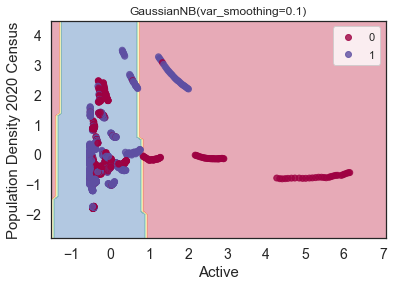

In [144]:
x30 = scaled_covid.values
y30 = covid['Recovered'].values
plot_decision_boundaries(x30, y30,'Active', 'Population Density 2020 Census',GaussianNB, var_smoothing=0.1)

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

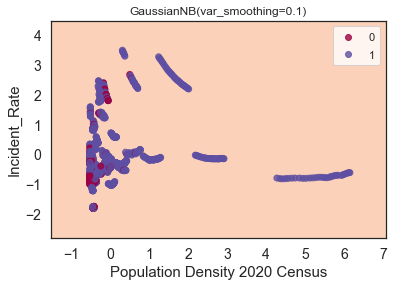

In [145]:
x31 = scaled_covid.values
y31 = covid['Deaths'].values
plot_decision_boundaries(x31, y31,'Population Density 2020 Census', 'Incident_Rate',GaussianNB, var_smoothing=0.1)

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

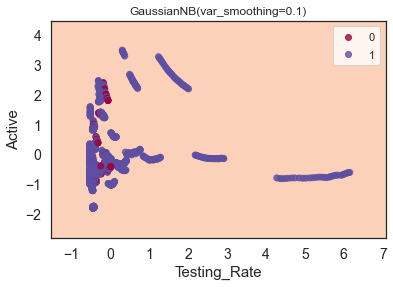

In [171]:
x32 = scaled_covid.values
y32 = covid['Confirmed'].values
plot_decision_boundaries(x32, y32,'Testing_Rate', 'Active',GaussianNB, var_smoothing=0.1)

In [150]:
# Initializing Classifiers
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

%matplotlib inline  
gs = gridspec.GridSpec(3, 2)

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier()

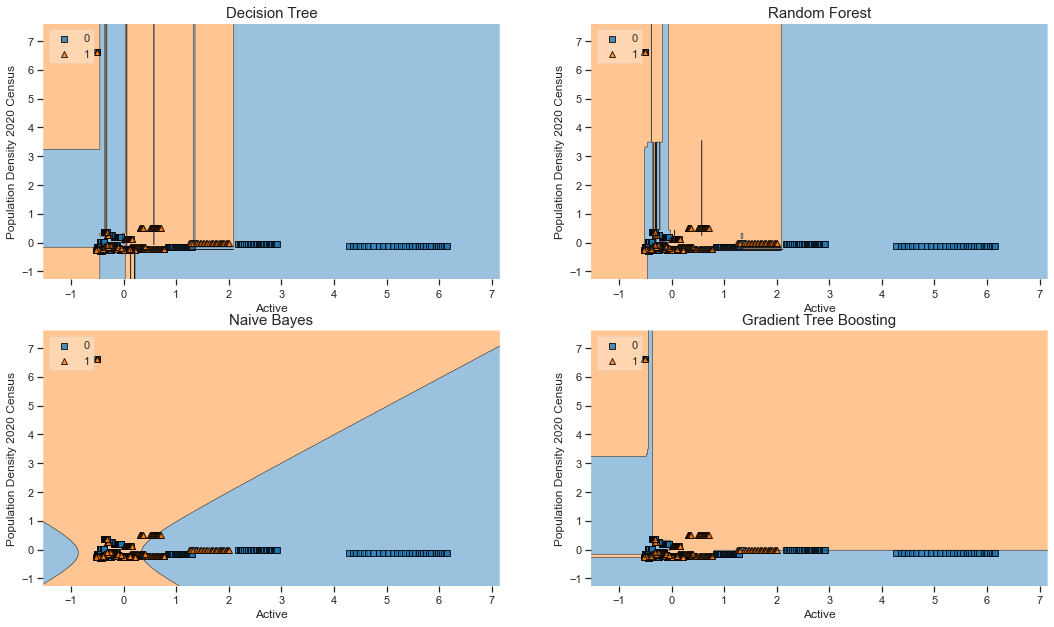

In [168]:
x33 = scaled_covid[['Active', 'Population Density 2020 Census']].values
y33 = covid['Recovered'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x30, y30)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x33, y=y33, clf=clf, legend=2)
    plt.xlabel('Active')
    plt.ylabel('Population Density 2020 Census')
    plt.title(lab, fontsize=15)
plt.show()

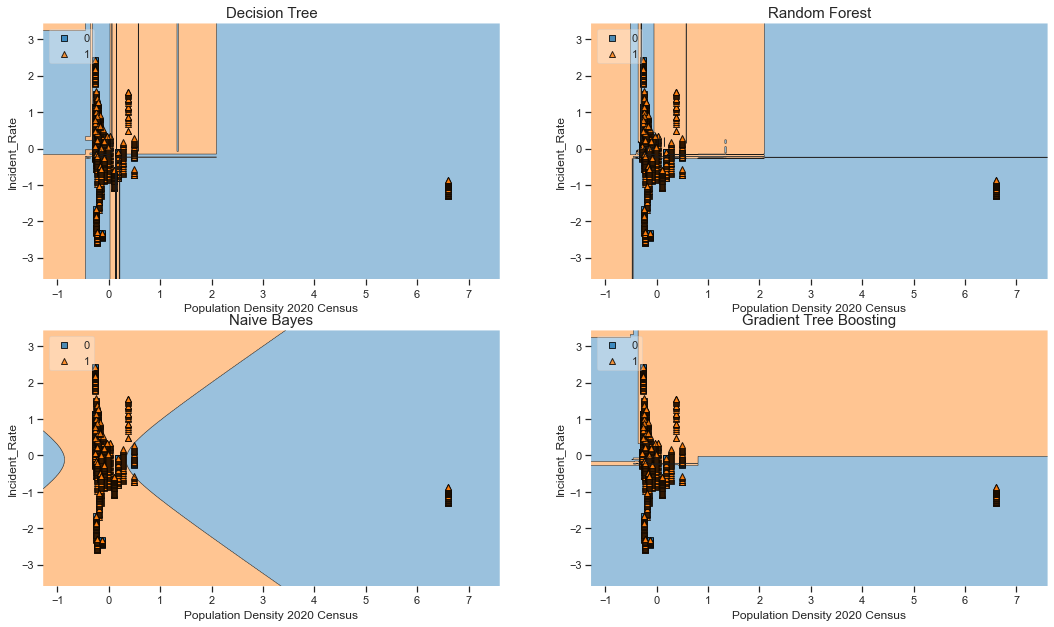

In [169]:
x34 = scaled_covid[['Population Density 2020 Census', 'Incident_Rate']].values
y34 = covid['Deaths'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x30, y30)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x34, y=y34, clf=clf, legend=2)
    plt.xlabel('Population Density 2020 Census')
    plt.ylabel('Incident_Rate')
    plt.title(lab, fontsize=15)
plt.show()

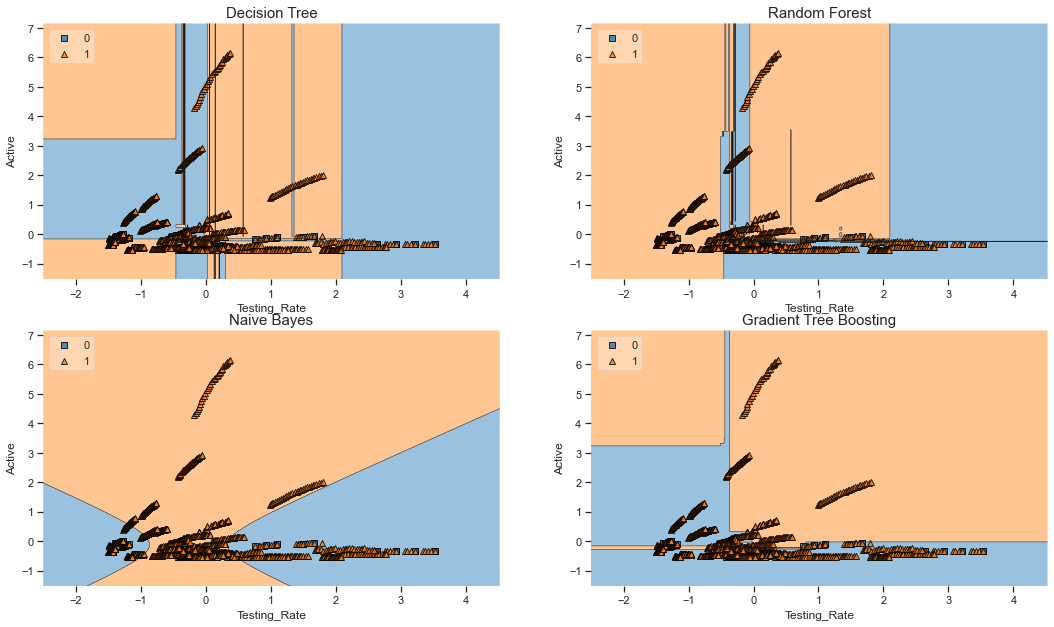

In [170]:
x35 = scaled_covid[['Testing_Rate', 'Active']].values
y35 = covid['Confirmed'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x30, y30)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x35, y=y35, clf=clf, legend=2)
    plt.xlabel('Testing_Rate')
    plt.ylabel('Active')
    plt.title(lab, fontsize=15)
plt.show()